# Создание приложений с GUI

## Обзор графических библиотек
Строить графический интерфейс пользователя (GUI, Graphical User Interface) для программ на языке Python можно при помощи соответствующих библиотек компонентов графического интерфейса или, используя кальку с английского, библиотек виджетов.
Следующий список далеко не полон, но отражает многообразие существующих решений:

1) Tkinter Многоплатформенный пакет имеет хорошее управление расположением компонентов. Интерфейс выглядит одинаково на различных платформах (Unix, Windows, Macintosh). Входит в стандартную поставку Python. В качестве документации можно использовать руководство "An Introduction to Tkinter" ("Введение в Tkinter"), написанное Фредриком Лундом: http://www.pythonware.com/library/tkinter/introduction/
2) wxPython Построен на многоплатформной библиотеке wxWidgets (раньше называлась wxWindows). Выглядит родным для всех платформ, активно совершенствуется, осуществлена поддержка GL. Имеется для всех основных платформ. Возможно, займет место Tkinter в будущих версиях Python. Сайт: http://www.wxpython.org/
3) PyGTK Набор визуальных компонентов для GTK+ и Gnome. Только для платформы GTK.
4) PyQT/PyKDE Хорошие пакеты для тех, кто использует Qt (под UNIX или Windows) или KDE.
5) Pythonwin Построен вокруг MFC, поставляется вместе с оболочкой в пакете win32all; только для Windows.
6) pyFLTK Аналог Xforms, поддержка OpenGL. Имеется для платформ Windows и Unix. Сайт: http://pyfltk.sourceforge.net/
7) AWT, JFC, Swing Поставляется вместе с Jython, а для Jython доступны средства, которые использует Java. Поддерживает платформу Java.
8) anygui Независимый от нижележащей платформы пакет для построения графического интерфейса для программ на Python. Сайт: http://anygui.sourceforge.net/
9) PythonCard Построитель графического интерфейса, сходный по идеологии с HyperCard/MetaCard. Разработан на базе wxPython. Сайт: http://pythoncard.sourceforge.net/
 

В лекции будет рассматриваться пакет Tkinter, который по сути является оберткой для Tcl/Tk - известного графического пакета для сценарного языка Tcl. На примере этого пакета легко изучить основные принципы построения графического интерфейса пользователя. 

## О графическом интерфейсе
Почти все современные графические интерфейсы общего назначения строятся по модели WIMP - Window, Icon, Menu, Pointer (окно, иконка, меню, указатель). Внутри окон рисуются элементы графического интерфейса, которые для краткости будут называться виджетами (**widget**). Меню могут располагаться в различных частях окна, но их поведение достаточно однотипно: они служат для выбора действия из набора предопределенных действий. Пользователь графического интерфейса "объясняет" компьютерной программе требуемые действия с помощью указателя. Обычно указателем служит курсор мыши или джойстика, однако есть и другие "указательные" устройства. С помощью иконок графический интерфейс приобретает независимость от языка и в некоторых случаях позволяет быстрее ориентироваться в интерфейсе.
 

Основной задачей графического интерфейса является упрощение коммуникации между пользователем и компьютером. Об этом следует постоянно помнить при проектировании интерфейса. Применение имеющихся в наличии у программиста (или дизайнера) средств при создании графического интерфейса нужно свести до минимума, выбирая наиболее удобные пользователю виджеты в каждом конкретном случае. Кроме того, полезно следовать принципу наименьшего удивления: из формы интерфейса должно быть понятно его поведение. Плохо продуманный интерфейс портит ощущения пользователя от программы, даже если за фасадом интерфейса скрывается эффективный алгоритм. Интерфейс должен быть удобен для типичных действий пользователя. Для многих приложений такие действия выделены в отдельные серии экранов, называемые "мастерами" (wizards). Однако если приложение - скорее конструктор, из которого пользователь может строить нужные ему решения, типичным действием является именно построение решения. Определить типичные действия не всегда легко, поэтому компромиссом может быть гибрид, в котором есть "мастера" и хорошие возможности для собственных построений. Тем не менее, графический интерфейс не является самым эффективным интерфейсом во всех случаях. Для многих предметных областей решение проще выразить с помощью деклараций на некотором формальном языке или алгоритма на сценарном языке.


## Преимущества Tkinter:

- Данный тулкит по умолчанию включен в стандартную библиотеку языка Python в виде отдельного модуля, поэтому не потребуется что-то дополнительно устанавливать

- Tkinter - кроссплатформенный, один и тот же код будет работать одинаково на разных платформах (Mac OS, Linux и Windows)

- Tkinter легко изучать. Сам тулкит, хотя и содержит некоторый готовый код, виджеты и графические элементы, но при этом довольно лаконичен и прост.

- Tk распространяется по BSD-лицензии, поэтому библиотека может быть использована как в опенсорсных проектах, так и в коммерческих наработках.

## Основы Tk
Основная черта любой программы с графическим интерфейсом - интерактивность. Программа не просто что-то считает (в пакетном режиме) от начала своего запуска до конца: ее действия зависят от вмешательства пользователя. Фактически, графическое приложение выполняет бесконечный цикл обработки событий. Программа, реализующая графический интерфейс, событийно- ориентирована. Она ждет от интерфейса событий, которые и обрабатывает сообразно своему внутреннему состоянию.


Эти события возникают в элементах графического интерфейса (виджетах) и обрабатываются прикрепленными к этим виджетам обработчиками. Сами виджеты имеют многочисленные свойства (цвет, размер, расположение), выстраиваются в иерархию принадлежности (один виджет может быть хозяином другого), имеют методы для доступа к своему состоянию.


Расположением виджетов (внутри других виджетов) ведают так называемые менеджеры расположения. Виджет устанавливается на место по правилам менеджера расположения. Эти правила могут определять не только координаты виджета, но и его размеры. В Tk имеются три типа менеджеров расположения: простой упаковщик (pack), сетка (grid) и произвольное расположение (place).


Но этого для работы графической программы недостаточно. Дело в том, что некоторые виджеты в графической программе должны быть взаимосвязаны определенным образом. Например, полоска прокрутки может быть взаимосвязана с текстовым виджетом: при использовании полоски текст в виджете должен двигаться, и наоборот, при перемещении по тексту полоска должна показывать текущее положение. Для связи между виджетами в Tk используются переменные, через которые виджеты и передают друг другу параметры.


## Классы виджетов
Для построения графического интерфейса в библиотеке Tk отобраны следующие классы виджетов (в алфавитном порядке).
Это элементы, с помощью которых пользователи взаимодействуют с вашей программой. Каждый виджет в Tkinter определяется классом. Вот некоторые из доступных виджетов:
1) Button (Кнопка) Простая кнопка для вызова некоторых действий (выполнения определенной команды).
2) Canvas (Рисунок) Основа для вывода графических примитивов.
3) Checkbutton (Флажок) Кнопка, которая умеет переключаться между двумя состояниями при нажатии на нее.
4) Entry (Однострочное поле ввода) Горизонтальное поле, в которое можно ввести строку текста.
5) Frame (Рамка/Фрейм, который организует виджеты в группы) Виджет, который содержит в себе другие визуальные компоненты.
6) Label (Надпись/Текстовая метка) Виджет может показывать текст или графическое изображение.
7) Listbox (Список) Прямоугольная рамка со списком, из которого пользователь может выделить один или несколько элементов.
8) Menu (Элемент меню) Элемент, с помощью которого можно создавать всплывающие (popup) и ниспадающие (pulldown) меню.
9) Menubutton (Кнопка-меню) Кнопка с ниспадающим меню.
10) Message (Сообщение) Аналогично надписи, но позволяет заворачивать длинные строки и менять размер по требованию менеджера расположения.
11) Radiobutton (Переключатель) Кнопка для представления одного из альтернативных значений. Такие кнопки, как правило, действует в группе. При нажатии на одну из них кнопка группы, выбранная ранее, "отскакивает".
12) Scale (Шкала) Служит для задания числового значения путем перемещения движка в определенном диапазоне.
13) Scrollbar (Полоса прокрутки) Полоса прокрутки служит для отображения величины прокрутки в других виджетах. Может быть как вертикальной, так и горизонтальной.
14) Text (Форматированный текст/Многострочное поле ввода) Этот прямоугольный виджет позволяет редактировать и форматировать текст с использованием различных стилей, внедрять в текст рисунки и даже окна.
15) Toplevel (Окно верхнего уровня) Показывается как отдельное окно и содержит внутри другие виджеты.
16) Notebook (Панель вкладок)

И др.

Все эти классы не имеют отношений наследования друг с другом - они равноправны. Этот набор достаточен для построения интерфейса в большинстве случаев.


## Создание первого GUI-приложения на Python с помощью Tkinter

Первое, что вам нужно сделать, это импортировать модуль Python GUI Tkinter.
Напр. так:
```Py
import tkinter as tk
```
Window - это экземпляр класса Tkinter's Tk. Создайте новое окно и присвойте его переменной window:
```Py
window = tk.Tk()
```
В конце добавляем:
```Py
window.mainloop()
```
Оформление окна будет в зависимости от ОС.

Запустим скрипт:

In [2]:
import tkinter as tk
window = tk.Tk()

window.mainloop()

**window.mainloop()** указывает Python на запуск цикла событий Tkinter. Этот метод прослушивает события, такие как нажатие кнопок или нажатие клавиш, и блокирует выполнение любого последующего кода, пока вы не закроете окно, в котором вызвали этот метод. Закройте созданное окно, и вы увидите новое приглашение, отображаемое в оболочке. (Речь про REPL)

Предупреждение: Когда вы работаете с Tkinter из Python REPL, обновления окон применяются по мере выполнения каждой строки. Это не так, когда программа Tkinter выполняется из файла Python!

Если вы не включите window.mainloop() в конец программы в файле Python, то приложение Tkinter никогда не запустится, и ничего не будет отображено. В качестве альтернативы вы можете создавать свой пользовательский интерфейс постепенно в Python REPL, вызывая window.update() после каждого шага для отражения изменений.
Создание окна в Tkinter занимает всего пару строк кода. Но пустые окна не очень полезны! В следующем разделе вы узнаете о некоторых виджетах, доступных в Tkinter, и о том, как их можно настроить под нужды вашего приложения.

## Размеры и начальная позиция окна
По умолчанию окно имеет некоторые стандартные размеры. Для установки размеров используется метод geometry(). Например, определение окна с шириной в 300 единиц и высотой 250 единиц:
```Py
window.geometry("300x250")
```
По умолчанию окно позиционируется в верхний левый угол экрана с небольшим смещением. Но мы можем изменить его положение, передав нужные значения в метод geometry():
```Py
window..geometry("300x250+400+200")
```
Теперь строка в методе geometry имеет следующий формат: "Ширина x Высота + координатаX + координатаY". То есть при запуске окно шириной в 300 единиц и высотой 250 единиц будет находиться на 400 пикселей вправо и на 200 пикселей вниз от верхнего левого угла экрана.

Для получения данных о размере и позиции также можно использовать метод geometry(), который возвращает данные значения в виде строки в формате "widthxheight+x+y":
print(window.geometry())

По умолчанию мы можем изменять размеры окна. Тем не менее иногда может потребоваться сделать размер окна фиксированным. В этом случае мы можем использовать метод resizable(). Его первый параметр указывает, может ли пользователь растягивать окно по ширине, а второй параметр - можно ли растягивать по высоте. 
```Py
window.resizable(False, False)
```
Также можно установить минимальные и максимальные размеры окна:
```Py
window.minsize(200,150)   # минимальные размеры: ширина - 200, высота - 150
window.maxsize(400,300)   # максимальные размеры: ширина - 400, высота - 300
```
По умолчанию заголовок окна - "tk". Для установки заголовка применяется метод title(), в который передается текст заголовка:
```Py
window.title("Hello METANIT.COM")
```
Перехват закрытия окна
```
...
def finish():
    window.destroy()  # ручное закрытие окна и всего приложения
    print("Закрытие приложения")
...
window.protocol("WM_DELETE_WINDOW", finish)
```
Первый параметр метода protocol() представляет имя события, в данном случае это "WM_DELETE_WINDO". Второй параметр представляет функцию, которая вызывается при возникновении события. Здесь эта функция finish(), в котором с помощью метода destroy() вручную вызываем закрытие окна (а с ним и всего приложения), а затем выводим на консоль некоторое сообщение.

Атрибуты окна

С помощью специального метода attributes() можно установать отдельные атрибуты окна, для которых нет специальных методов. В качестве первого параметра метод принимает название атрибута, которое предваряется дефисом. А второй параметр - значение для этого атрибута. Например, растяжение окна на весь экран:
```
window.attributes("-fullscreen", True)
```
```
window.attributes("-alpha", 0.5)
window.attributes("-toolwindow", True)
```
Иконка.
```
window.iconbitmap(default="favicon.ico")
```

## Добавление виджета
Теперь, когда у вас есть окно, вы можете добавить виджет. Используйте класс tk.Label для добавления текста в окно. Создайте виджет Label с текстом "Hello, Tkinter" и присвойте его переменной greeting:
```Py
greeting = tk.Label(text="Hello, Tkinter")
```
Окно, которое вы создали ранее, не изменится. Вы только что создали виджет Label, но еще не добавили его в окно. Существует несколько способов добавления виджетов в окно. Сейчас вы можете использовать метод .pack() виджета Label:
```Py
greeting.pack()
```

In [4]:
import tkinter as tk
window = tk.Tk()

greeting = tk.Label(text="Hello, Tkinter")
greeting.pack()

window.mainloop()

## Classic vs Themed Widgets
Стоит отметить, что в настоящее время в Tkinter существует две широкие категории виджетов:

Классические виджеты: Доступны в пакете tkinter, например, tkinter.Label

Тематические виджеты: Доступны в подмодуле ttk, например tkinter.ttk.Label

Классические виджеты Tkinter хорошо настраиваются и просты, но на большинстве современных платформ они выглядят устаревшими или несколько чужеродными. Если вы хотите воспользоваться преимуществами виджетов с родным внешним видом и ощущениями, знакомыми пользователям данной операционной системы, то вам стоит обратить внимание на тематические виджеты.

Большинство тематических виджетов практически полностью заменяют свои устаревшие аналоги, но имеют более современный вид. Вы также можете использовать несколько совершенно новых виджетов, таких как индикатор выполнения, которых раньше не было в Tkinter. В то же время, вам придется продолжать использовать некоторые классические виджеты, у которых нет тематической альтернативы.

Примечание: Тематические виджеты в модуле tkinter.ttk по умолчанию используют родной вид и оформление операционной системы. Однако вы можете изменить их тему для получения индивидуального внешнего вида, например, светлого и темного режимов. Тема - это набор многократно используемых определений стилей, которые можно представить как каскадную таблицу стилей (CSS) для Tkinter.

Создание новых виджетов с поддержкой тем означало извлечение большей части их стилевой информации в отдельные объекты. С одной стороны, такое разделение задач является желаемым свойством дизайна библиотеки, но с другой стороны, оно вводит дополнительный уровень абстракции, что делает тематические виджеты более сложными для стилизации, чем классические.


При работе с обычными и тематическими виджетами в Tkinter принято объявлять следующие псевдонимы для пакетов и модулей Tkinter:

import tkinter as tk

import tkinter.ttk as ttk

Подобные псевдонимы позволяют вам явно ссылаться в одной программе, например, на tk.Label или ttk.Label, в зависимости от ваших потребностей.

Полный список виджетов Tkinter можно найти в разделе Основные виджеты (https://tkdocs.com/tutorial/widgets.html) и дополнительные виджеты(https://tkdocs.com/tutorial/morewidgets.html) в учебнике TkDocs. Несмотря на то, что там описываются тематические виджеты, появившиеся в Tcl/Tk 8.5, большая часть информации, содержащейся там, применима и к классическим виджетам.



## Создание виджета происходит вызовом конструктора соответствующего класса.Вызов конструктора имеет следующий синтаксис:
Widget([master[, option=value, ...]])
Здесь Widget - класс виджета, master - виджет-хозяин, option и value - конфигурационная опция и ее значение (таких пар может быть несколько).
Каждый виджет имеет свойства, которые можно устанавливать (конфигурировать) с помощью методов config() (или configure() ) и читать с помощью методов, подобных методам работы со словарями. Ниже приведен возможный синтаксис для работы со свойствами:
```Py
widget.config(option=value, ...)
widget["option"] = value 
value = widget["option"] 
widget.keys()
```


## Отображение текста и изображений с помощью виджетов Label

Label(master, options)

Параметр master представляет ссылку на родительский контейнер, а параметр options представляет следующие именованные параметры

- anchor: устанавливает позиционирование текста

- background: фоновый цвет

- borderwidth: толщина границы метки

- cursor: курсор указателя мыши при наведении на метку

- font: шрифт текста

- foreground: цвет текста

- height: высота виджета

- image: ссылка на изображение, которое отображается на метке

- justify: устанавливает выравнивание текста. Значение LEFT выравнивает текст по левому краю, CENTER - по центру, RIGHT - по правому краю

- pading: отступы от границ вилжета до его текста

- relief: определяет тип границы, по умолчанию значение FLAT

- text: устанавливает текст метки

- textvariable: устанавливает привязку к элементу StringVar

- underline: указывает на номер символа в тексте кнопки, который подчеркивается. По умолчанию значение -1, то есть никакой символ не подчеркивается

- width: ширина виджета

- wraplength: при положительном значении строки текста будут переносится для вмещения в пространство виджета


Виджеты Label используются для отображения текста или изображений. Текст, отображаемый виджетом Label, не может быть отредактирован пользователем. Он предназначен только для отображения. Как вы видели в примере в начале этого руководства, вы можете создать виджет Label, инстанцировав (Инстанцирование (англ. instantiation) — создание экземпляра класса.) класс Label и передав строку в параметре text:
```Py
label = tk.Label(text="Hello, Tkinter")
```
 Виджеты Label отображают текст с системным цветом текста по умолчанию и системным цветом фона текста по умолчанию. Обычно это черный и белый цвета соответственно, но вы можете видеть другие цвета, если вы изменили эти настройки в своей операционной системе.

Вы можете управлять цветами текста и фона Label с помощью параметров foreground и background:
```Py
label = tk.Label(
    text="Hello, Tkinter",
    foreground="white",  # Set the text color to white
    background="black"  # Set the background color to black
)
```

Многие из названий цветов HTML работают в Tkinter. См. док-ю.

Вы также можете задать цвет, используя шестнадцатеричные значения RGB:
```Py
label = tk.Label(text="Hello, Tkinter", background="#34A2FE")
```

Если вам не хочется постоянно вводить foreground и background, то для задания цветов переднего плана и фона можно использовать сокращенные параметры fg и bg:
```Py
label = tk.Label(text="Hello, Tkinter", fg="white", bg="black")
```
Вы также можете управлять шириной и высотой ярлыка с помощью параметров width и height:
```Py
label = tk.Label(
    text="Hello, Tkinter",
    fg="white",
    bg="black",
    width=10,
    height=10
)
```
Вот как выглядит эта надпись в окне:

In [1]:
import tkinter as tk
window = tk.Tk()

label = tk.Label(
    text="Hello, Tkinter",
    fg="white",
    bg="black",
    width=10,
    height=10
)
label.pack()

window.mainloop()

Может показаться странным, что Label в окне не квадратный, хотя ширина и высота установлены на 10. Это происходит потому, что ширина и высота измеряются в текстовых единицах (text units). Одна горизонтальная единица текста определяется шириной символа 0, или числа ноль, в системном шрифте по умолчанию. Аналогично, одна вертикальная единица текста определяется высотой символа 0.

Примечание: Для измерения ширины и высоты Tkinter использует текстовые единицы, а не дюймы, сантиметры или пиксели, чтобы обеспечить последовательное поведение приложения на разных платформах.

Измерение единиц по ширине символа означает, что размер виджета соотносится со шрифтом по умолчанию на машине пользователя. Это обеспечивает правильное размещение текста в ярлыках и кнопках независимо от того, где запущено приложение.
Ярлыки отлично подходят для отображения текста, но они не помогут вам получить ввод от пользователя. Следующие три виджета, о которых вы узнаете, используются для получения пользовательского ввода.

## Отображение кликабельных кнопок с помощью виджетов кнопок
Виджеты кнопок используются для отображения нажимаемых кнопок. Вы можете настроить их так, чтобы они вызывали функцию при каждом нажатии на них. О том, как вызывать функции при нажатии на кнопку, будет рассказано в следующем разделе. Пока же рассмотрим, как создать и оформить кнопку.

Между виджетами Button и Label есть много общего. Во многих отношениях кнопка - это просто ярлык, на который можно нажать! Те же аргументы ключевых слов, которые вы используете для создания и стилизации Label, будут работать и с виджетами Button. Например, следующий код создает кнопку с синим фоном и желтым текстом. Он также устанавливает ширину и высоту в 25 и 5 текстовых единиц соответственно:

In [2]:
import tkinter as tk
window = tk.Tk()

button = tk.Button(
    text="Click me!",
    width=25,
    height=5,
    bg="blue",
    fg="yellow"
)
button.pack()

window.mainloop()

### Основные параметры виджета Button:

- command: функция, которая вызывается при нажатии на кнопку

- compund: устанавливает расположение картинки и текста относительно друг друга

- cursor: курсор указателя мыши при наведении на метку

- image: ссылка на изображение, которое отображается на метке

- pading: отступы от границ вилжета до его текста

- state: состояние кнопки

- text: устанавливает текст метки

- textvariable: устанавливает привязку к элементу StringVar

- underline: указывает на номер символа в тексте кнопки, который подчеркивается. По умолчанию значение -1, то есть никакой символ не подчеркивается

- width: ширина виджета

In [3]:
#
from tkinter import *
from tkinter import ttk
 
clicks = 0
 
def click_button():
    global clicks
    clicks += 1
    # изменяем текст на кнопке
    btn["text"] = f"Clicks {clicks}"   
 
root = Tk()
root.title("W.Prog")
root.geometry("250x150")
 
btn = ttk.Button(text="Click Me", command=click_button)
btn.pack()
 
root.mainloop()

Для ttk-кнопки мы можем установить отключенное состояние с помощью метода state(), передав ему значение "disabled". С такой кнопкой пользователь не сможет взаимодействовать:
```
btn = ttk.Button(text="Click Me", state=["disabled"])
```

## Получение пользовательского ввода с помощью виджетов ввода

Элемент Entry представляет поле для ввода текста. С помощью конструктора Entry можно установить ряд параметров, основные из них:

- background: фоновый цвет

- cursor: курсор указателя мыши при наведении на текстовое поле

- foreground: цвет текста

- font: шрифт текста

- justify: устанавливает выравнивание текста. Значение LEFT выравнивает текст по левому краю, CENTER - по центру, RIGHT - по правому краю

- show: задает маску для вводимых символов

- state: состояние элемента, может принимать значения NORMAL (по умолчанию) и DISABLED

- textvariable: устанавливает привязку к элементу StringVar

- width: ширина элемента

Элемент Entry имеет ряд методов. Основные из них:

- insert(index, str): вставляет в текстовое поле строку по определенному индексу

- get(): возвращает введенный в текстовое поле текст

- delete(first, last=None): удаляет символ по индексу first. Если указан параметр last, то удаление производится до индекса last. Чтобы удалить до конца, в качестве второго параметра можно использовать значение END.

- focus(): установить фокус на текстовое поле



Когда вам нужно получить от пользователя небольшой текст, например, имя или адрес электронной почты, используйте виджет Entry. Он отобразит небольшое текстовое поле, в которое пользователь может ввести текст. Создание и оформление виджета Entry происходит точно так же, как и виджетов Label и Button. Например, следующий код создает виджет с синим фоном, желтым текстом и шириной 50 единиц текста:
```Py
entry = tk.Entry(fg="yellow", bg="blue", width=50)
```
Самое интересное в виджетах Entry - это не то, как их стилизовать. А в том, как использовать их для получения ввода от пользователя. Существует три основные операции, которые можно выполнять с виджетами Entry:

- Получение текста с помощью .get()
- Удаление текста с помощью .delete()
- Вставка текста с помощью .insert()

Лучший способ получить представление о виджетах Entry - это создать один из них и взаимодействовать с ним.

В REPL:
```Py
import tkinter as tk
window = tk.Tk()

# Now create a Label and an Entry widget:
label = tk.Label(text="Name")
entry = tk.Entry()

label.pack()
entry.pack()
```

Введите текст в форму.
Когда вы ввели некоторый текст в виджет Entry, но этот текст еще не был отправлен в вашу программу. Вы можете использовать .get(), чтобы получить текст и присвоить его переменной name:
```Py
name = entry.get()
name
```
Вы также можете удалять текст. Метод .delete() принимает целочисленный аргумент, который сообщает Python, какой символ нужно удалить. Например, приведенный ниже блок кода показывает, как .delete(0) удаляет первый символ из Entry:
```Py
entry.delete(0)
```
Обратите внимание, что, как и строковые объекты Python, текст в виджете Entry индексируется, начиная с 0.

Если вам нужно удалить несколько символов из Entry, то передайте второй целочисленный аргумент в .delete(), указывающий индекс символа, на котором удаление должно остановиться. Например, следующий код удаляет первые четыре буквы в Entry:
```Py
entry.delete(0, 4)
```

Entry.delete() работает подобно нарезке строк. Первый аргумент определяет начальный индекс, и удаление продолжается до индекса, переданного в качестве второго аргумента, но не включая его. Используйте специальную константу tk.END для второго аргумента .delete(), чтобы удалить весь текст в Entry:
```Py
entry.delete(0, tk.END)
```
На противоположном конце спектра вы также можете вставить текст в виджет Entry:
```Py
entry.insert(0, "Python")
```

## Получение многострочного пользовательского ввода с помощью Text виджетов
Виджеты Text используются для ввода текста, как и виджеты Entry. Разница в том, что виджеты Text могут содержать несколько строк текста. С помощью виджета Text пользователь может ввести целый абзац или даже несколько страниц текста! Как и с виджетами ввода, с виджетами Text можно выполнять три основные операции:

- Получить текст с помощью .get()
- Удалить текст с помощью .delete()
- Вставить текст с помощью .insert()

Хотя названия методов такие же, как и у методов Entry, они работают немного по-другому. Пришло время испачкать руки, создав виджет Text и посмотрев, что он может делать.

Примечание: У вас все еще открыто окно из предыдущего раздела?

Если да, то вы можете закрыть его, выполнив следующее:
```Py
window.destroy()
```
Вы также можете закрыть его вручную, нажав на кнопку Close.
В оболочке Python создайте новое пустое окно и поместите в него виджет Text():

In [5]:
import tkinter as tk
window = tk.Tk()

text_box = tk.Text()
text_box.pack()

window.mainloop()

Как и в случае с виджетами Entry, вы можете получить текст из виджета Text с помощью .get(). Однако вызов .get() без аргументов не возвращает полный текст в текстовом поле, как это происходит с виджетами Entry. Возникает исключение:

```
>>> text_box.get()
Traceback (most recent call last):
  ...
TypeError: get() missing 1 required positional argument: 'index1'
```

Text.get() требует как минимум одного аргумента. Вызов .get() с одним индексом возвращает один символ. Чтобы получить несколько символов, необходимо передать начальный и конечный индексы. Индексы в виджетах Text работают иначе, чем в виджетах Entry. Поскольку виджеты Text могут содержать несколько строк текста, индекс должен содержать две части информации:

номер строки, на которой находится символ
Положение символа в этой строке.
Номера строк начинаются с 1, а позиции символов - с 0. Чтобы создать индекс, создайте строку вида "```<line>.<char>```", заменив ```<line>``` номером строки, а ```<char>``` - номером символа. Например, "1.0" представляет первый символ первой строки, а "2.3" - четвертый символ второй строки.

```
#input:
Hello
World
```

Используйте индекс "1.0", чтобы получить первую букву из текстового поля, которое вы создали ранее:
```
text_box.get("1.0")
```
Чтобы получить слово Hello из текстового поля, используйте "1.0" для первого индекса и "1.5" для второго:
```
>>> text_box.get("1.0", "1.5")
'Hello'
```

Чтобы получить слово World на второй строке текстового поля, измените номера строк в каждом индексе на 2:
```
>>> text_box.get("2.0", "2.5")
'World'
```
Чтобы получить весь текст в текстовом поле, установите начальный индекс в "1.0" и используйте специальную константу tk.END для второго индекса:
```
>>> text_box.get("1.0", tk.END)
'Hello\nWorld\n'
```

Delete. 
```
>>> text_box.delete("1.0")
>>> text_box.delete("1.0", "1.4")
```
Insert.
```
>>> text_box.insert("1.0", "Hello")
>>> text_box.insert("2.0", "World") # Добавит в конец первой 
>>> text_box.insert("2.0", "\nWorld") # На новую строку с помощью \n

Append text.
>>> text_box.insert(tk.END, "Put me at the end!")
>>> text_box.insert(tk.END, "\nPut me on a new line!")
```


## Назначение виджетов фреймам с помощью фреймовых виджетов

Frame отображает прямоугольник и обычно применяется для организации интерфейса в отдельные блоки. Некоторые основные параметры, которые мы можем установить через конструктор класса Frame:

- borderwidth: толщина границы фрейма, по умолчанию равно 0

- relief: определяет тип границы, может принимать значения SUNKEN, RAISED, GROOVE, RIDGE

- cursor: устанавливает курсор при наведении на фрейм

- height: высота фрейма

- width: ширина фрейма

- padding: отступы от вложенного содержимого до границ фрейма

```
frame = ttk.Frame(borderwidth=1, relief=SOLID, padding=[8, 10])
```

Виджеты **Frame** важны для организации расположения виджетов в приложении.

Прежде чем перейти к деталям визуального представления виджетов, рассмотрим подробнее, как работают виджеты Frame и как можно назначать им другие виджеты. Следующий сценарий создает пустой виджет Frame и назначает его на главное окно приложения:

In [1]:
import tkinter as tk

window = tk.Tk()
frame = tk.Frame()
frame.pack()

window.mainloop()

frame.pack() упаковывает frame в window таким образом, чтобы окно имело минимальный размер, позволяющий охватить кадр. Когда вы запустите вышеприведенный сценарий, вы получите очень неинтересный результат.

Пустой виджет Frame практически невидим. Фреймы лучше всего рассматривать как контейнеры для других виджетов. Вы можете назначить виджет фрейму, установив атрибут master виджета:
```Py
frame = tk.Frame()
label = tk.Label(master=frame)
```
Чтобы понять, как это работает, напишите сценарий, который создает два виджета Frame с именами frame_a и frame_b. В этом сценарии frame_a содержит Label с текстом "Я во фрейме A", а frame_b содержит Label "Я во фрейме B". Вот один из способов сделать это:

In [1]:
import tkinter as tk

window = tk.Tk()

frame_a = tk.Frame()
frame_b = tk.Frame()

label_a = tk.Label(master=frame_a, text="I'm in Frame A")
label_a.pack()

label_b = tk.Label(master=frame_b, text="I'm in Frame B")
label_b.pack()

frame_a.pack()
frame_b.pack()

window.mainloop()

Теперь посмотрите, что произойдет, если поменять местами порядок выполнения frame_a.pack() и frame_b.pack():

In [2]:
import tkinter as tk

window = tk.Tk()

frame_a = tk.Frame()
label_a = tk.Label(master=frame_a, text="I'm in Frame A")
label_a.pack()

frame_b = tk.Frame()
label_b = tk.Label(master=frame_b, text="I'm in Frame B")
label_b.pack()

# Swap the order of `frame_a` and `frame_b`
frame_b.pack()
frame_a.pack()

window.mainloop()

Теперь label_b находится сверху. Поскольку label_b назначена кадру_b, она перемещается в то место, где расположен кадр_b.

Все четыре типа виджетов, о которых вы узнали - метка, кнопка, запись и текст - имеют master атрибут, который устанавливается при их создании. Таким образом, вы можете контролировать, к какому фрейму относится тот или иной виджет. Виджеты Frame отлично подходят для логической организации других виджетов. Связанные виджеты можно назначить одному фрейму, чтобы при перемещении фрейма в окне связанные виджеты оставались вместе.

Примечание: Если вы опустите аргумент master при создании нового экземпляра виджета, то по умолчанию он будет размещен внутри окна верхнего уровня.
Помимо логической группировки виджетов, виджеты Frame могут добавить немного изюминки в визуальное представление вашего приложения. (Borders)

## Параметры виджета

Виджет обладает набором параметров, которые позволяют настроить его внешний вид и поведение. У каждого виджета свой набор параметров. Обычно параметры задаются через конструктор. Например, в примере выше у кнопки устанавливался параметр text, который задает текст на кнопке:
```Py
ttk.Button(text="Click") # устанавливаем параметр text
```
Но обращаться к параметрам можно и вне конструктора, используя имя переменной виджета и синтаксис словарей:

In [3]:
from tkinter import *
from tkinter import ttk
 
root = Tk()
root.title("Hello")
root.geometry("250x150")
 
btn = ttk.Button()
btn.pack()
# устанавливаем параметр text
btn["text"]="Send"
# получаем значение параметра text
btnText = btn["text"]
print(btnText)
 
root.mainloop()

Send


Для изменения параметров виджета также можно использовать метод config(), в который передаются параметры и их значения:

```Py
btn = ttk.Button()
btn.pack()
# устанавливаем параметр text
btn.config(text="Send Email")
```

Каждый виджет имеет свойства, которые можно устанавливать (конфигурировать) с помощью методов config() (или configure() ) и читать с помощью методов, подобных методам работы со словарями. Ниже приведен возможный синтаксис для работы со свойствами:
```Py
widget.config(option=value, ...)
widget["option"] = value 
value = widget["option"] 
widget.keys()
```

Изменять конфигурацию виджета можно в любой момент. Это изменение прорисуется на экране по возвращении в цикл обработки событий или при явном вызове update_idletasks().

### Получение информации о виджете

Для получения информации о виджете можно использовать ряд его атрибутов. Рассмотрим некоторые из них:

- winfo_class: возвращает класс виджета, например, для кнопки это класс TButton

- winfo_children: возвращает для текущего виджета список вложенных виджетов

- winfo_parent: возвращает родительский виджет

- winfo_toplevel: возвращает окно, которое содержит данный виджет

- winfo_width и winfo_height: текущая ширина и высота виджета

- winfo_reqwidth и winfo_reqheight: запрошенная виджетом ширина и высота

- winfo_x и winfo_y: x и y координаты верхнего левого угла виджета относительно родительского элемента

- winfo_rootx и winfo_rooty: x и y координаты верхнего левого угла виджета относительно экрана

- winfo_viewable: указывает, отображается ли виджет или скрыт

Например, получим информацию о всех виджетах в окне:

In [4]:
from tkinter import *
 
root = Tk()
root.title("Prog")
root.geometry("250x200")
 
btn = Button(text="Hello")
btn.pack()
 
 
def print_info(widget, depth=0):
    widget_class=widget.winfo_class()
    widget_width = widget.winfo_width()
    widget_height = widget.winfo_height()
    widget_x = widget.winfo_x()
    widget_y = widget.winfo_y()
    print("   "*depth + f"{widget_class} width={widget_width} height={widget_height}  x={widget_x} y={widget_y}")
    for child in widget.winfo_children():
        print_info(child, depth+1)
 
root.update()     # обновляем информацию о виджетах
 
print_info(root)
 
root.mainloop()

Tk width=250 height=200  x=92 y=130
   Button width=67 height=28  x=91 y=0


: 

: 

Здесь определена функция print_info(), которая в качестве параметров получает виджет, информацию о котором надо вывести на консоль, и уровень в визуальной иерархии элементов (depth).

В самой функции для виджета выводим информацию о классе, ширине, высоте и координатах Х и Y, а также для каждого вложенного виджета рекурсивно вызываем эту же функцию.

Чтобы установленные размеры и позиции были применены к виджетам до вызыва root.mainloop(), вызываем метод root.update()

## Настройка внешнего вида Frame с помощью рельефов
Виджеты фреймов могут быть настроены с атрибутом relief, который создает границу вокруг фрейма. Вы можете установить для рельефа любое из следующих значений:

- tk.FLAT: Не имеет эффекта границы (значение по умолчанию)
- tk.SUNKEN: Создает эффект утопленности.
- tk.RAISED: Создает эффект приподнятости
- tk.GROOVE: Создает эффект рифленой границы
- tk.RIDGE: Создает эффект ребристости.

Чтобы применить эффект границы, необходимо установить атрибут borderwidth в значение больше 1. Этот атрибут регулирует ширину границы в пикселях. Лучший способ понять, как выглядит каждый эффект, - это увидеть их своими глазами. Вот сценарий, который помещает в окно пять виджетов Frame, каждый с разным значением аргумента relief:


In [1]:
import tkinter as tk

border_effects = {
    "flat": tk.FLAT,
    "sunken": tk.SUNKEN,
    "raised": tk.RAISED,
    "groove": tk.GROOVE,
    "ridge": tk.RIDGE,
}

window = tk.Tk()

for relief_name, relief in border_effects.items():
    frame = tk.Frame(master=window, relief=relief, borderwidth=5)
    frame.pack(side=tk.LEFT)
    label = tk.Label(master=frame, text=relief_name)
    label.pack()

window.mainloop()

## Соглашения об именовании виджетов
Widget Naming Conventions

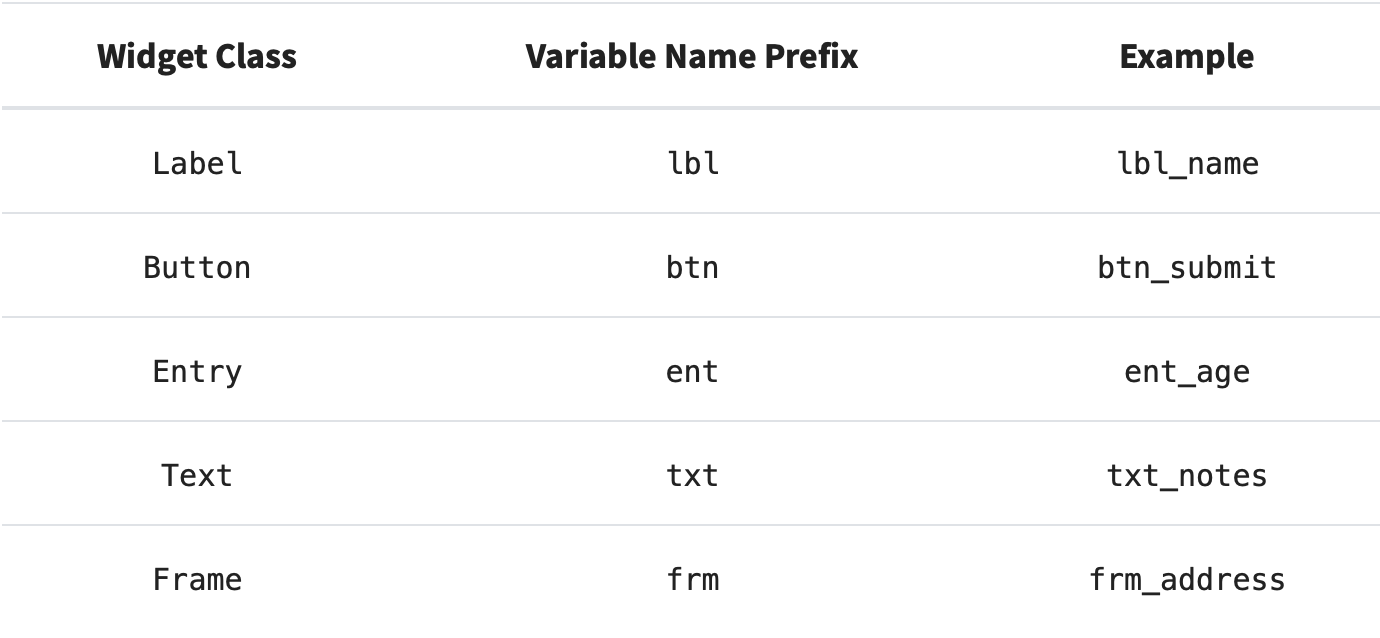

## Управление компоновкой с помощью менеджеров геометрии
До сих пор вы добавляли виджеты в окна и виджеты Frame с помощью .pack(), но вы не знали, что именно делает этот метод. Давайте проясним ситуацию! Разметка приложения в Tkinter управляется с помощью менеджеров геометрии. Хотя .pack() является примером менеджера геометрии, он не единственный. В Tkinter есть еще два:

- .place()
- .grid()

Каждое окно или фрейм в вашем приложении может использовать только один менеджер геометрии. Однако разные фреймы могут использовать разные менеджеры геометрии, даже если они назначены фрейму или окну, использующему другой менеджер геометрии. Начнем с более подробного рассмотрения функции .pack().

### Менеджер геометрии .pack()

Этот метод принимает следующие параметры:

- expand: если равно True, то виджет заполняет все пространство контейнера.

- fill: определяет, будет ли виджет растягиваться, чтобы заполнить свободное пространство вокруг. Этот параметр может принимать следующие значения: NONE (по умолчанию, элемент не растягивается), X (элемент растягивается только по горизонтали), Y (элемент растягивается только по вертикали) и BOTH (элемент растягивается по вертикали и горизонтали).

- anchor: помещает виджет в определенной части контейнера. Может принимать значения n, e, s, w, ne, nw, se, sw, c, которые являются сокращениями от Noth(север - вверх), South (юг - низ), East (восток - правая сторона), West (запад - левая сторона) и Center (по центру). Например, значение nw указывает на верхний левый угол

- side: выравнивает виджет по одной из сторон контейнера. Может принимать значения: TOP (по умолчанию, выравнивается по верхней стороне контейнера), BOTTOM (выравнивание по нижней стороне), LEFT (выравнивание по левой стороне), RIGHT (выравнивание по правой стороне).

- ipadx: устанавливает отступ содержимого виджета от его границы по горизонтали.

- ipady: устанавливают отступ содержимого виджета от его границы по вертикали.

- padx: устанавливает отступ виджета от границ контейнера по горизонтали.

- pady: устанавливает отступ виджета от границ контейнера по вертикали.


Менеджер геометрии .pack() использует алгоритм упаковки для размещения виджетов во фрейме или окне в определенном порядке. Для данного виджета алгоритм упаковки состоит из двух основных этапов:

Вычислить прямоугольную область, называемую посылкой(parcel), которая достаточно высока (или широка) для размещения виджета и заполняет оставшуюся ширину (или высоту) окна пустым пространством.
Отцентрируйте виджет в посылке, если не указано другое расположение.
.pack() является мощным инструментом, но его может быть трудно визуализировать. Лучший способ получить представление о .pack() - посмотреть несколько примеров. Посмотрите, что происходит, когда вы .pack() помещаете три виджета Label во фрейм:

In [2]:
import tkinter as tk

window = tk.Tk()

frame1 = tk.Frame(master=window, width=100, height=100, bg="red")
frame1.pack()

frame2 = tk.Frame(master=window, width=50, height=50, bg="yellow")
frame2.pack()

frame3 = tk.Frame(master=window, width=25, height=25, bg="blue")
frame3.pack()

window.mainloop()

.pack() по умолчанию помещает каждый фрейм под предыдущим в том порядке, в котором они назначены окну.

Каждый фрейм размещается в самой верхней доступной позиции. Поэтому красная рамка размещается в верхней части окна. Затем желтый фрейм размещается чуть ниже красного, а синий - чуть ниже желтого.

Есть три невидимых посылки, каждая из которых содержит один из трех виджетов Frame. Ширина каждой посылки равна ширине окна, а высота - высоте фрейма, который она содержит. Поскольку при вызове .pack() для каждого фрейма не была указана точка привязки, все они центрированы внутри своих посылок. Поэтому каждый фрейм центрируется в окне.

.pack() принимает некоторые ключевые аргументы для более точной настройки размещения виджетов. Например, вы можете задать аргумент ключевого слова fill, чтобы указать, в каком направлении должны заполняться фреймы. Возможны следующие варианты: tk.X - заполнение в горизонтальном направлении, tk.Y - в вертикальном и tk.BOTH - в обоих направлениях. Вот как можно сложить три кадра так, чтобы каждый из них заполнил все окно по горизонтали.
```
frame1.pack(fill=tk.X) # И для других фреймов
```
Обратите внимание, что ширина не задана ни для одного из виджетов Frame. Ширина больше не нужна, потому что каждый фрейм устанавливает .pack() для горизонтального заполнения, перекрывая любую ширину, которую вы можете задать.
Однако обратите внимание, что виджеты Frame не расширяются в вертикальном направлении.

Аргумент side ключевого слова .pack() определяет, на какой стороне окна должен быть размещен виджет. Вот доступные варианты:

tk.TOP

tk.BOTTOM

tk.LEFT

tk.RIGHT

Если вы не зададите параметр side, то .pack() будет автоматически использовать tk.TOP и размещать новые виджеты в верхней части окна или в самой верхней части окна, которая еще не занята виджетом. Например, следующий сценарий размещает три рамки рядом слева направо и расширяет каждую рамку, чтобы заполнить окно по вертикали:

In [3]:
import tkinter as tk

window = tk.Tk()

frame1 = tk.Frame(master=window, width=200, height=100, bg="red")
frame1.pack(fill=tk.Y, side=tk.LEFT)

frame2 = tk.Frame(master=window, width=100, bg="yellow")
frame2.pack(fill=tk.Y, side=tk.LEFT)

frame3 = tk.Frame(master=window, width=50, bg="blue")
frame3.pack(fill=tk.Y, side=tk.LEFT)

window.mainloop()

Чтобы сделать макет действительно адаптивным, можно задать начальный размер фреймов с помощью атрибутов width и height. Затем установите для аргумента fill ключевого слова .pack() значение tk.BOTH и установите для аргумента expand ключевое слово True:

In [4]:
import tkinter as tk

window = tk.Tk()

frame1 = tk.Frame(master=window, width=200, height=100, bg="red")
frame1.pack(fill=tk.BOTH, side=tk.LEFT, expand=True)

frame2 = tk.Frame(master=window, width=100, bg="yellow")
frame2.pack(fill=tk.BOTH, side=tk.LEFT, expand=True)

frame3 = tk.Frame(master=window, width=50, bg="blue")
frame3.pack(fill=tk.BOTH, side=tk.LEFT, expand=True)

window.mainloop()

## Менеджер геометрии .place()
Вы можете использовать .place() для управления точным расположением виджета в окне или фрейме. Вы должны предоставить два ключевых аргумента, x и y, которые задают x- и y-координаты для левого верхнего угла виджета. И x, и y измеряются в пикселях, а не в текстовых единицах.

Следует помнить, что начало координат, где x и y равны 0, является левым верхним углом фрейма или окна. Поэтому аргумент y в команде .place() можно рассматривать как количество пикселей от верхней границы окна, а аргумент x - как количество пикселей от левого края окна.

Вот пример того, как работает менеджер геометрии .place():

In [5]:
import tkinter as tk

window = tk.Tk()

frame = tk.Frame(master=window, width=150, height=150)
frame.pack()

label1 = tk.Label(master=frame, text="I'm at (0, 0)", bg="red")
label1.place(x=0, y=0)

label2 = tk.Label(master=frame, text="I'm at (75, 75)", bg="yellow")
label2.place(x=75, y=75)

window.mainloop()

## Менеджер геометрии .grid()

Метод grid применяет следующие параметры:

- column: номер столбца, отсчет начинается с нуля

- row: номер строки, отсчет начинается с нуля

- columnspan: сколько столбцов должен занимать элемент

- rowspan: сколько строк должен занимать элемент

- ipadx и ipady: отступы по горизонтали и вертикали соответственно от границ элемента до его содержимого

- padx и pady: отступы по горизонтали и вертикали соответственно от границ ячейки грида до границ элемента

- sticky: выравнивание элемента в ячейке, если ячейка больше элемента. Может принимать значения n, e, s, w, ne, nw, se, sw, которые указывают соответствующее направление выравнивания

Менеджер геометрии, который вы будете использовать чаще всего, это .grid(), который предоставляет все возможности .pack() в формате, который легче понять и поддерживать.

.grid() работает путем разбиения окна или фрейма на строки и столбцы. Вы указываете расположение виджета, вызывая .grid() и передавая индексы строк и столбцов в качестве аргументов ключевых слов row и column соответственно. Индексы строк и столбцов начинаются с 0, поэтому индекс строки 1 и индекс столбца 2 указывает .grid() на размещение виджета в третьем столбце второй строки.

Следующий сценарий создает сетку фреймов 3 × 3 с упакованными в них виджетами Label:

In [1]:
import tkinter as tk

window = tk.Tk()

for i in range(3):
    for j in range(3):
        frame = tk.Frame(
            master=window,
            relief=tk.RAISED,
            borderwidth=1
        )
        frame.grid(row=i, column=j)
        label = tk.Label(master=frame, text=f"Row {i}\nColumn {j}")
        label.pack()

window.mainloop()

Здесь важно понимать, что, хотя .grid() вызывается на каждом объекте Frame, менеджер геометрии применяется к объекту window. Аналогично, расположение каждого фрейма контролируется с помощью менеджера геометрии .pack().

В предыдущем примере фреймы расположены плотно друг к другу. Чтобы добавить немного пространства вокруг каждого фрейма, можно задать отступ каждой ячейки сетки. Padding - это пустое пространство, которое окружает виджет и визуально выделяет его содержимое.

Существует два типа подкладок: внешняя и внутренняя. external добавляет некоторое пространство вокруг внешней стороны ячейки сетки. Она управляется двумя аргументами ключевого слова .grid():

- padx добавляет external padding в горизонтальном направлении.
- pady добавляет external padding в вертикальном направлении.

И padx, и pady измеряются в пикселях, а не в текстовых единицах, поэтому при установке одинакового значения padding в обоих направлениях будет одинаковым. Попробуйте добавить подложку вокруг внешних рамок из предыдущего примера:

In [2]:
import tkinter as tk

window = tk.Tk()

for i in range(3):
    for j in range(3):
        frame = tk.Frame(
            master=window,
            relief=tk.RAISED,
            borderwidth=1
        )
        frame.grid(row=i, column=j, padx=5, pady=5) # <--
        label = tk.Label(master=frame, text=f"Row {i}\nColumn {j}")
        label.pack()

window.mainloop()

Следующий код почти идентичен предыдущему, за исключением того, что вы добавляете по пять пикселей дополнительной пространства вокруг каждого Label в направлениях x и y:

In [3]:
import tkinter as tk

window = tk.Tk()

for i in range(3):
    for j in range(3):
        frame = tk.Frame(
            master=window,
            relief=tk.RAISED,
            borderwidth=1
        )
        frame.grid(row=i, column=j, padx=5, pady=5)
        label = tk.Label(master=frame, text=f"Row {i}\nColumn {j}")
        label.pack(padx=5, pady=5)

window.mainloop()

Выглядит довольно симпатично! Но если вы попытаетесь развернуть окно в любом направлении, то заметите, что макет не очень отзывчив.

При расширении окна вся сетка остается в левом верхнем углу.

Используя .columnconfigure() и .rowconfigure() для объекта window, вы можете настроить рост строк и столбцов сетки при изменении размеров окна. Помните, что сетка привязана к окну, даже если вы вызываете .grid() для каждого виджета Frame. И .columnconfigure(), и .rowconfigure() принимают три основных аргумента:

Index: Индекс столбца или строки сетки, которую вы хотите настроить, или список индексов для одновременной настройки нескольких строк или столбцов.

Weight: Аргумент ключевого слова weight, который определяет, как столбец или строка должны реагировать на изменение размера окна относительно других столбцов и строк.

Minimum Size: Аргумент ключевого слова minsize задает минимальный размер высоты строки или ширины столбца в пикселях.


weight по умолчанию имеет значение 0, что означает, что столбец или строка не расширяется при изменении размеров окна. Если каждому столбцу или строке присвоен вес 1, то все они растут с одинаковой скоростью. Если вес одного столбца равен 1, а другого - 2, то второй столбец будет расширяться в два раза быстрее первого. Скорректируйте предыдущий скрипт, чтобы он лучше справлялся с изменением размеров окна:

In [4]:
import tkinter as tk

window = tk.Tk()

for i in range(3):
    window.columnconfigure(i, weight=1, minsize=75)
    window.rowconfigure(i, weight=1, minsize=50)

    for j in range(0, 3):
        frame = tk.Frame(
            master=window,
            relief=tk.RAISED,
            borderwidth=1
        )
        frame.grid(row=i, column=j, padx=5, pady=5)
        label = tk.Label(master=frame, text=f"Row {i}\nColumn {j}")
        label.pack(padx=5, pady=5)

window.mainloop()

.columnconfigure() и .rowconfigure() размещаются в теле внешнего цикла for. Вы можете явно настроить каждый столбец и строку вне цикла for, но это потребует написания дополнительных шести строк кода.

На каждой итерации цикла для i-го столбца и строки задается вес, равный 1. Это гарантирует, что при изменении размера окна строки и столбцы будут расширяться с одинаковой скоростью. Аргумент minsize установлен на 75 для каждого столбца и 50 для каждой строки. Это гарантирует, что виджет Label всегда отображает свой текст без обрезания символов, даже если размер окна очень мал.

В результате получается макет сетки, который плавно расширяется и сжимается при изменении размеров окна.

По умолчанию виджеты центрируются в ячейках сетки. Например, следующий код создает два виджета Label и размещает их в сетке с одним столбцом и двумя строками:

In [6]:
import tkinter as tk

window = tk.Tk()
window.columnconfigure(0, minsize=250)
window.rowconfigure([0, 1], minsize=100)

label1 = tk.Label(text="A")
label1.grid(row=0, column=0)

label2 = tk.Label(text="B")
label2.grid(row=1, column=0)

window.mainloop()

Каждая ячейка сетки имеет ширину 250 пикселей и высоту 100 пикселей. Label размещаются в центре каждой ячейки.

Вы можете изменить расположение каждой метки внутри ячейки сетки с помощью параметра sticky, который принимает строку, содержащую одну или несколько следующих букв:

- "n" или "N" для выравнивания по верхней центральной части ячейки
- "e" или "E" для выравнивания по правому центру ячейки
- "s" или "S" для выравнивания по нижней центральной части ячейки
- "w" или "W" для выравнивания по левой центральной части ячейки.

Буквы "n", "s", "e" и "w" обозначают кардинальные направления - север, юг, восток и запад. Установка "sticky" на "n" для обеих меток в предыдущем коде позиционирует каждую метку в верхнем центре своей ячейки сетки:

Параметр sticky задает выравнивание виджета в ячейке, если размер ячейки больше размера этого виджета. Этот параметр может принимать следующие значения:

In [1]:
import tkinter as tk

window = tk.Tk()
window.columnconfigure(0, minsize=250)
window.rowconfigure([0, 1], minsize=100)

label1 = tk.Label(text="A")
label1.grid(row=0, column=0, sticky="n")

label2 = tk.Label(text="B")
label2.grid(row=1, column=0, sticky="n")

window.mainloop()

Вы можете объединить несколько букв в одну строку, чтобы расположить каждую метку в углу своей ячейки сетки:

In [2]:
import tkinter as tk

window = tk.Tk()
window.columnconfigure(0, minsize=250)
window.rowconfigure([0, 1], minsize=100)

label1 = tk.Label(text="A")
label1.grid(row=0, column=0, sticky="ne")

label2 = tk.Label(text="B")
label2.grid(row=1, column=0, sticky="sw")

window.mainloop()

Когда виджет позиционируется с помощью "липкого" позиционирования, размер самого виджета становится достаточно большим, чтобы вместить любой текст и другое содержимое внутри него. Он не будет заполнять всю ячейку сетки. Чтобы заполнить сетку, вы можете указать "ns", чтобы заставить виджет заполнить ячейку в вертикальном направлении, или "ew", чтобы заполнить ячейку в горизонтальном направлении. Чтобы заполнить всю ячейку, задайте для параметра sticky значение "nsew". Следующий пример иллюстрирует каждую из этих опций:

In [3]:
import tkinter as tk

window = tk.Tk()

window.rowconfigure(0, minsize=50)
window.columnconfigure([0, 1, 2, 3], minsize=50)

label1 = tk.Label(text="1", bg="black", fg="white")
label2 = tk.Label(text="2", bg="black", fg="white")
label3 = tk.Label(text="3", bg="black", fg="white")
label4 = tk.Label(text="4", bg="black", fg="white")

label1.grid(row=0, column=0)
label2.grid(row=0, column=1, sticky="ew")
label3.grid(row=0, column=2, sticky="ns")
label4.grid(row=0, column=3, sticky="nsew")

window.mainloop()

Приведенный выше пример показывает, что параметр липкости менеджера геометрии .grid() можно использовать для достижения тех же эффектов, что и параметр fill менеджера геометрии .pack(). Соответствие между параметрами sticky и fill приведено в следующей таблице:

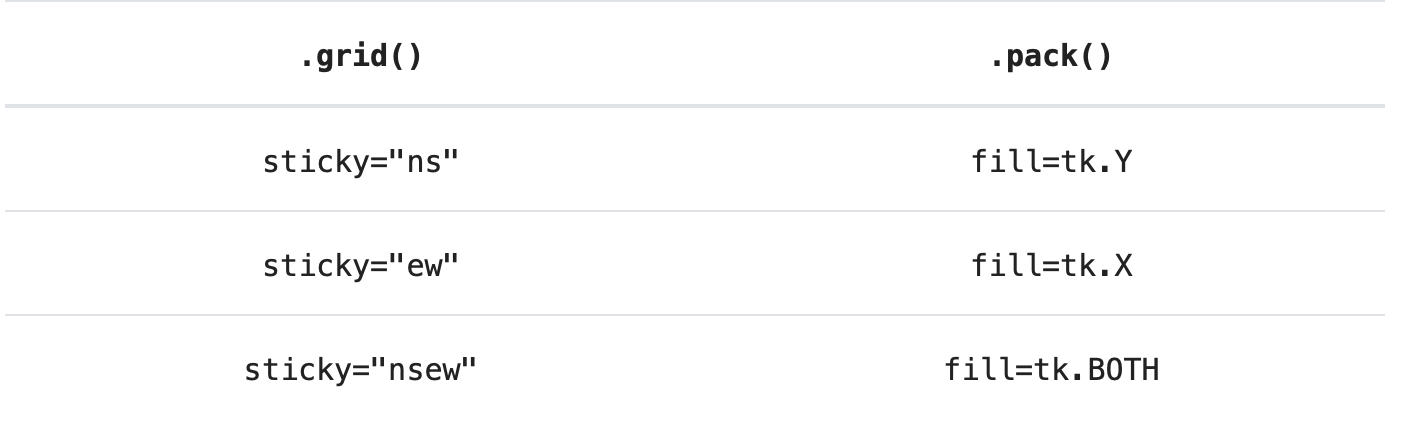

Объединение ячеек

Параметр columnspan указывает, сколько столбцов, а параметр

rowspan сколько строк должен занимать виджет. То есть с помощью подобных параметров мы можем объединить ячейки.

In [1]:
from tkinter import *
from tkinter import ttk
 
root = Tk()
root.title("M.window")
root.geometry("250x200")
 
for c in range(2): root.columnconfigure(index=c, weight=1)
for r in range(2): root.rowconfigure(index=r, weight=1)
 
btn1 = ttk.Button(text="button 1")
# columnspan=2 - растягиваем на два столбца
btn1.grid(row=0, column=0, columnspan=2, ipadx=70, ipady=6, padx=5, pady=5)
 
btn3 = ttk.Button(text="button 3")
btn3.grid(row=1, column=0, ipadx=6, ipady=6, padx=5, pady=5)
 
btn4 = ttk.Button(text="button 4")
btn4.grid(row=1, column=1, ipadx=6,  ipady=6, padx=5, pady=5)
 
root.mainloop()

## Ex1
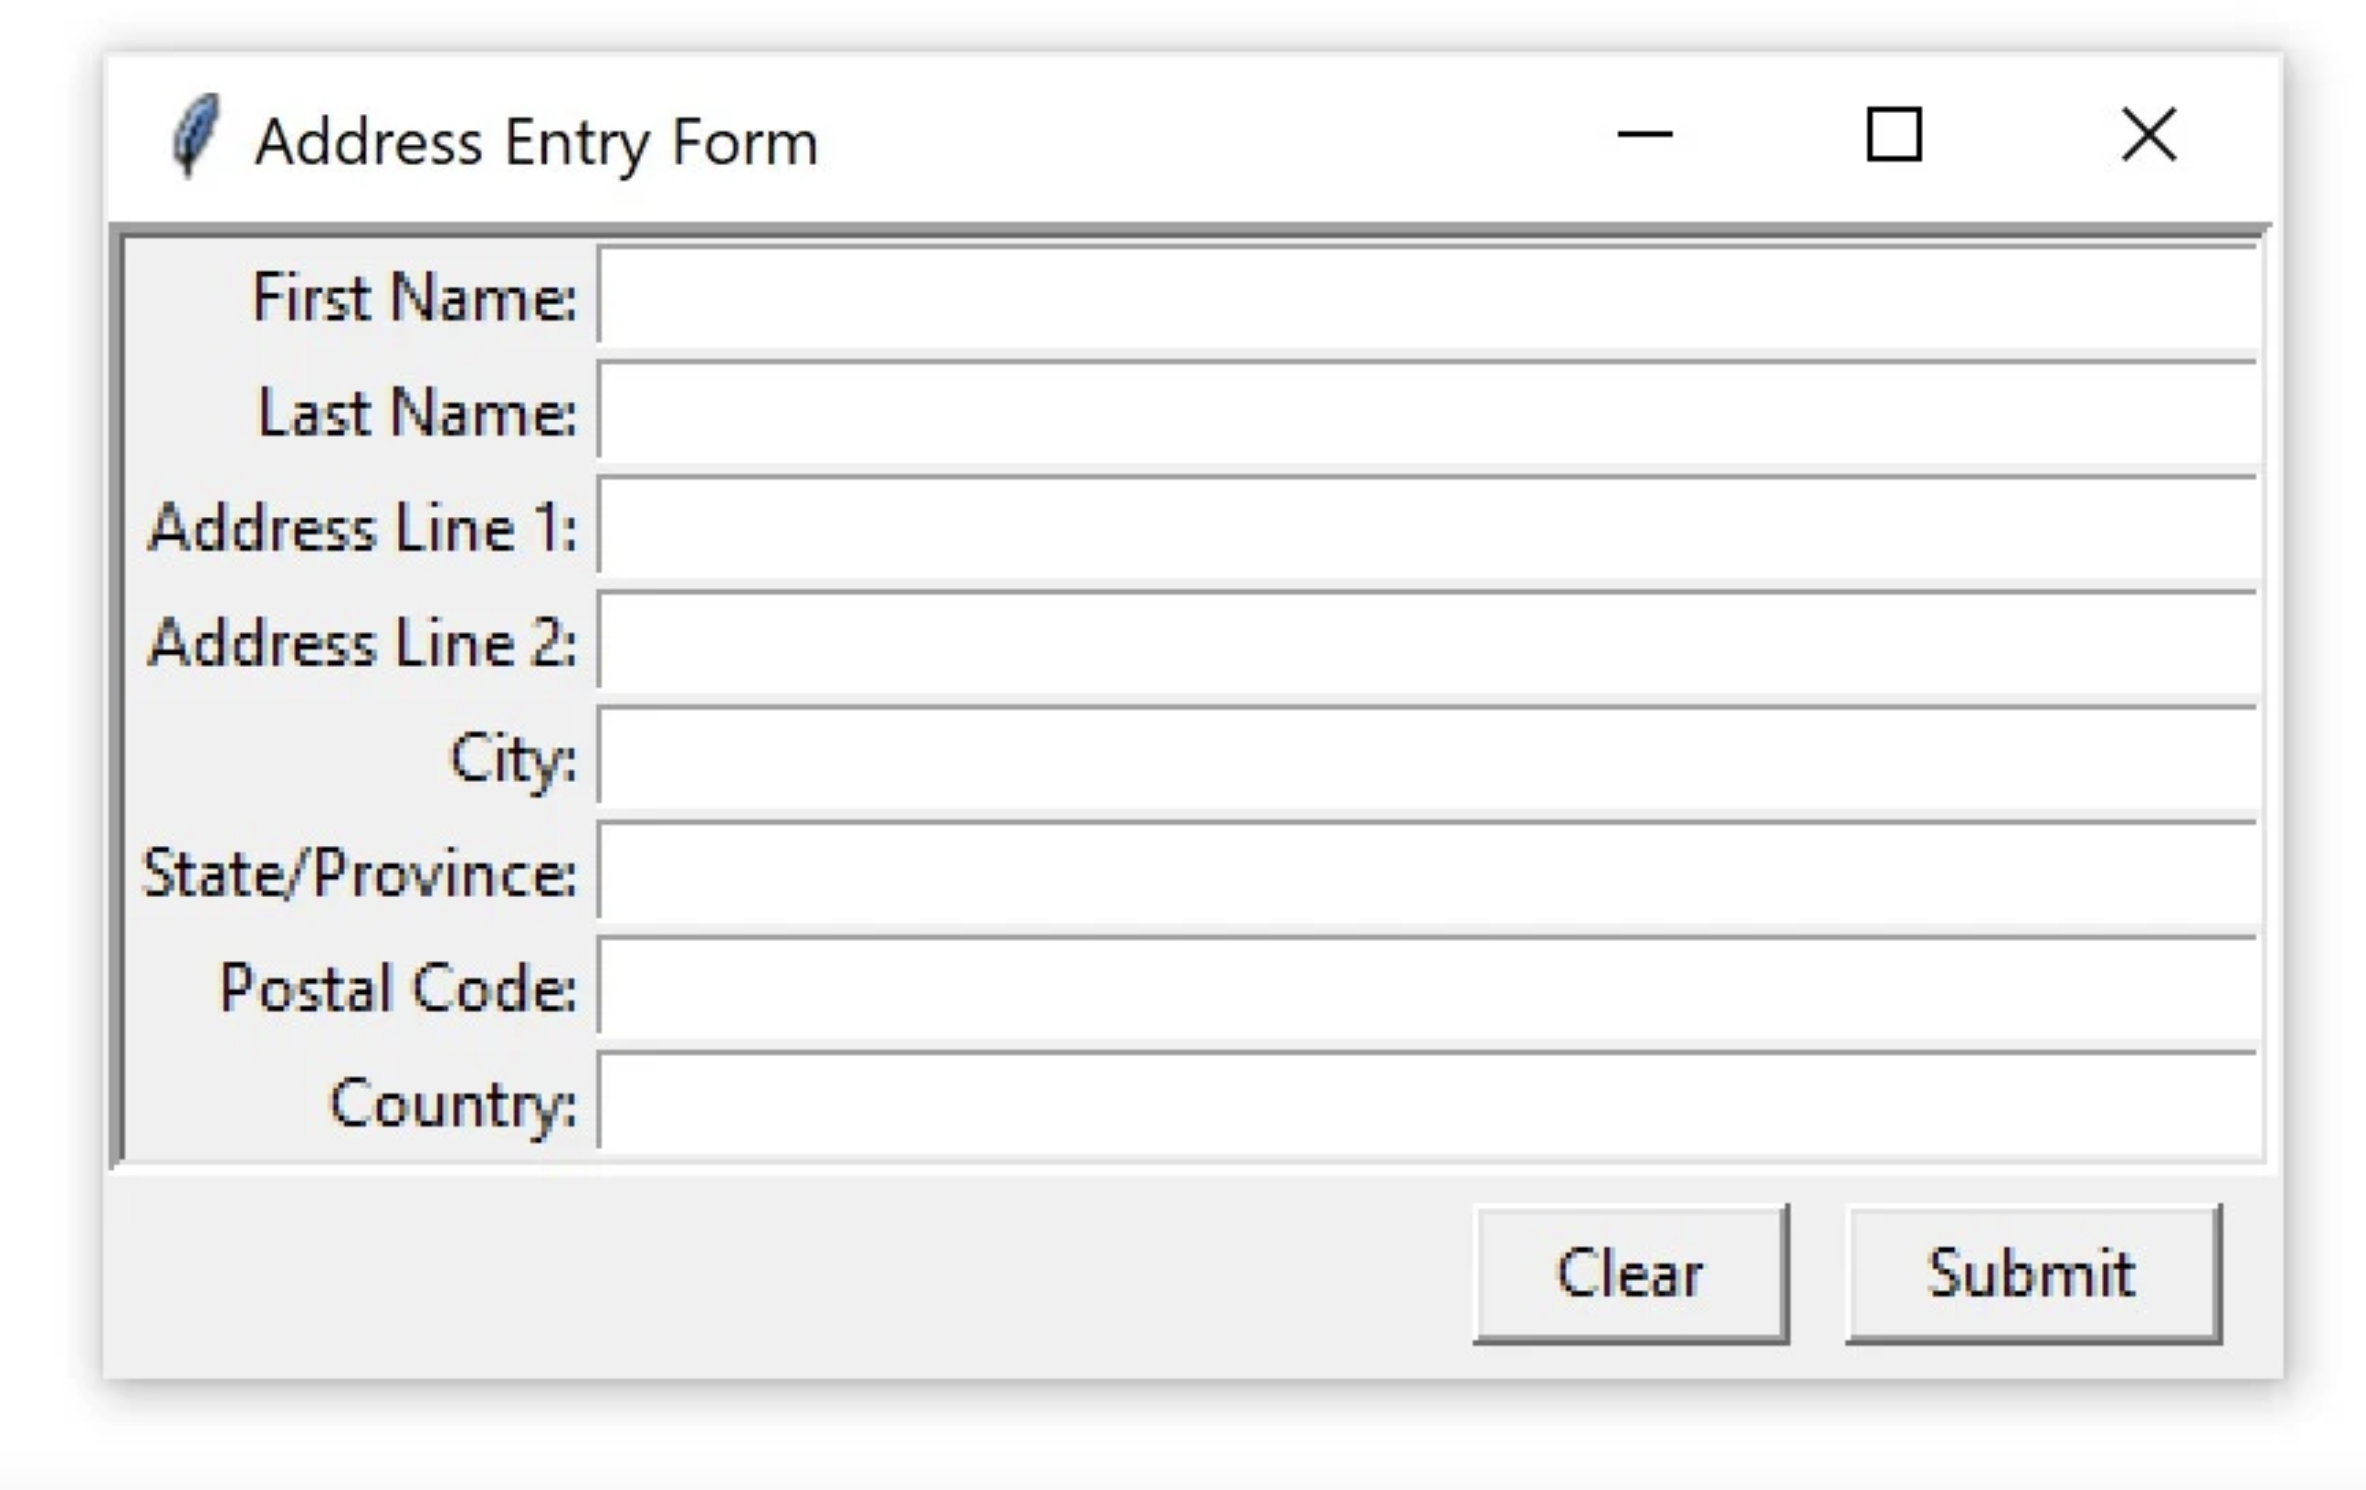

In [2]:
import tkinter as tk

# Create a new window with the title "Address Entry Form"
window = tk.Tk()
window.title("Address Entry Form")

# Create a new frame `frm_form` to contain the Label
# and Entry widgets for entering address information
frm_form = tk.Frame(relief=tk.SUNKEN, borderwidth=3)
# Pack the frame into the window
frm_form.pack()

# Create the Label and Entry widgets for "First Name"
lbl_first_name = tk.Label(master=frm_form, text="First Name:")
ent_first_name = tk.Entry(master=frm_form, width=50)
# Use the grid geometry manager to place the Label and
# Entry widgets in the first and second columns of the
# first row of the grid
lbl_first_name.grid(row=0, column=0, sticky="e")
ent_first_name.grid(row=0, column=1)

# Create the Label and Entry widgets for "Last Name"
lbl_last_name = tk.Label(master=frm_form, text="Last Name:")
ent_last_name = tk.Entry(master=frm_form, width=50)
# Place the widgets in the second row of the grid
lbl_last_name.grid(row=1, column=0, sticky="e")
ent_last_name.grid(row=1, column=1)

# Create the Label and Entry widgets for "Address Line 1"
lbl_address1 = tk.Label(master=frm_form, text="Address Line 1:")
ent_address1 = tk.Entry(master=frm_form, width=50)
# Place the widgets in the third row of the grid
lbl_address1.grid(row=2, column=0, sticky="e")
ent_address1.grid(row=2, column=1)

# Create the Label and Entry widgets for "Address Line 2"
lbl_address2 = tk.Label(master=frm_form, text="Address Line 2:")
ent_address2 = tk.Entry(master=frm_form, width=50)
# Place the widgets in the fourth row of the grid
lbl_address2.grid(row=3, column=0, sticky=tk.E)
ent_address2.grid(row=3, column=1)

# Create the Label and Entry widgets for "City"
lbl_city = tk.Label(master=frm_form, text="City:")
ent_city = tk.Entry(master=frm_form, width=50)
# Place the widgets in the fifth row of the grid
lbl_city.grid(row=4, column=0, sticky=tk.E)
ent_city.grid(row=4, column=1)

# Create the Label and Entry widgets for "State/Province"
lbl_state = tk.Label(master=frm_form, text="State/Province:")
ent_state = tk.Entry(master=frm_form, width=50)
# Place the widgets in the sixth row of the grid
lbl_state.grid(row=5, column=0, sticky=tk.E)
ent_state.grid(row=5, column=1)

# Create the Label and Entry widgets for "Postal Code"
lbl_postal_code = tk.Label(master=frm_form, text="Postal Code:")
ent_postal_code = tk.Entry(master=frm_form, width=50)
# Place the widgets in the seventh row of the grid
lbl_postal_code.grid(row=6, column=0, sticky=tk.E)
ent_postal_code.grid(row=6, column=1)

# Create the Label and Entry widgets for "Country"
lbl_country = tk.Label(master=frm_form, text="Country:")
ent_country = tk.Entry(master=frm_form, width=50)
# Place the widgets in the eight row of the grid
lbl_country.grid(row=7, column=0, sticky=tk.E)
ent_country.grid(row=7, column=1)

# Create a new frame `frm_buttons` to contain the
# Submit and Clear buttons. This frame fills the
# whole window in the horizontal direction and has
# 5 pixels of horizontal and vertical padding.
frm_buttons = tk.Frame()
frm_buttons.pack(fill=tk.X, ipadx=5, ipady=5)

# Create the "Submit" button and pack it to the
# right side of `frm_buttons`
btn_submit = tk.Button(master=frm_buttons, text="Submit")
btn_submit.pack(side=tk.RIGHT, padx=10, ipadx=10)

# Create the "Clear" button and pack it to the
# right side of `frm_buttons`
btn_clear = tk.Button(master=frm_buttons, text="Clear")
btn_clear.pack(side=tk.RIGHT, ipadx=10)

# Start the application
window.mainloop()

В этом решении нет ничего плохого. Оно немного длинное, но все очень четко описано. Если вы хотите что-то изменить, то ясно видно, где именно это нужно сделать.

Тем не менее, решение можно значительно сократить, если учесть, что каждый Entry имеет одинаковую ширину, и что все, что вам нужно для каждой Label - это текст:

In [3]:
import tkinter as tk

# Create a new window with the title "Address Entry Form"
window = tk.Tk()
window.title("Address Entry Form")

# Create a new frame `frm_form` to contain the Label
# and Entry widgets for entering address information
frm_form = tk.Frame(relief=tk.SUNKEN, borderwidth=3)
# Pack the frame into the window
frm_form.pack()

# List of field labels
labels = [
    "First Name:",
    "Last Name:",
    "Address Line 1:",
    "Address Line 2:",
    "City:",
    "State/Province:",
    "Postal Code:",
    "Country:",
]

# Loop over the list of field labels
for idx, text in enumerate(labels):
    # Create a Label widget with the text from the labels list
    label = tk.Label(master=frm_form, text=text)
    # Create an Entry widget
    entry = tk.Entry(master=frm_form, width=50)
    # Use the grid geometry manager to place the Label and
    # Entry widgets in the row whose index is idx
    label.grid(row=idx, column=0, sticky="e")
    entry.grid(row=idx, column=1)

# Create a new frame `frm_buttons` to contain the
# Submit and Clear buttons. This frame fills the
# whole window in the horizontal direction and has
# 5 pixels of horizontal and vertical padding.
frm_buttons = tk.Frame()
frm_buttons.pack(fill=tk.X, ipadx=5, ipady=5)

# Create the "Submit" button and pack it to the
# right side of `frm_buttons`
btn_submit = tk.Button(master=frm_buttons, text="Submit")
btn_submit.pack(side=tk.RIGHT, padx=10, ipadx=10)

# Create the "Clear" button and pack it to the
# right side of `frm_buttons`
btn_clear = tk.Button(master=frm_buttons, text="Clear")
btn_clear.pack(side=tk.RIGHT, ipadx=10)

# Start the application
window.mainloop()

## Создание интерактивных приложений
К настоящему времени вы уже имеете представление о том, как создать окно в Tkinter, добавить несколько виджетов и управлять макетом приложения. Это замечательно, но приложения должны не просто хорошо выглядеть - они должны что-то делать! В этом разделе вы узнаете, как оживить ваши приложения, выполняя действия при наступлении определенных событий.

### Использование событий и обработчиков событий
Using Events and Event Handlers

Когда вы создаете приложение Tkinter, вы должны вызвать window.mainloop(), чтобы запустить цикл событий. Во время цикла событий ваше приложение проверяет, произошло ли событие. Если да, то в ответ на него будет выполнен определенный код.

Цикл событий предоставляется вам вместе с Tkinter, поэтому вам не нужно писать код, который проверяет события самостоятельно. Однако вы должны написать код, который будет выполнен в ответ на событие. В Tkinter вы пишете функции, называемые обработчиками событий, для событий, которые вы используете в своем приложении.

Примечание: Событие - это любое действие, происходящее в цикле событий, которое может вызвать определенное поведение в приложении, например, нажатие клавиши или кнопки мыши.

Когда происходит событие, создается объект события, то есть создается экземпляр класса, представляющего событие. Вам не нужно беспокоиться о создании этих классов самостоятельно. Tkinter создаст экземпляры классов событий для вас автоматически.

Давайте рассмотрим свой собственный цикл событий, чтобы лучше понять, как работает цикл событий Tkinter. Таким образом, вы сможете увидеть, как цикл событий Tkinter вписывается в ваше приложение, и какие части вам нужно написать самостоятельно.

Предположим, что есть список под названием events, который содержит объекты событий. Новый объект event автоматически добавляется к events каждый раз, когда в вашей программе происходит событие. Вам не нужно реализовывать этот механизм обновления. В данном концептуальном примере он просто автоматически происходит за вас. Используя бесконечный цикл, вы можете постоянно проверять, есть ли в событиях объекты событий:

Предположим, ваше приложение должно реагировать на нажатие клавиш. Вам нужно проверить, что событие было сгенерировано пользователем, нажавшим клавишу на клавиатуре, и, если это так, передать событие в функцию обработчика событий для нажатия клавиш.

Предположим, что event имеет атрибут .type, установленный в строку "keypress", если событие является объектом события keypress, и атрибут .char, содержащий символ клавиши, которая была нажата. Создайте новую функцию handle_keypress() и обновите код цикла обработки событий:

In [ ]:
events = []

# Create an event handler
def handle_keypress(event):
    """Print the character associated to the key pressed"""
    print(event.char)

while True:
    if events == []:
        continue

    event = events[0]

    # If event is a keypress event object
    if event.type == "keypress":
        # Call the keypress event handler
        handle_keypress(event)

Когда вы вызываете window.mainloop(), для вас выполняется что-то вроде приведенного выше цикла. Этот метод позаботится о двух частях цикла:

- Он ведет список произошедших событий.
- Он запускает обработчик события каждый раз, когда новое событие добавляется в этот список.

:

In [ ]:
import tkinter as tk

# Create a window object
window = tk.Tk()

# Create an event handler
def handle_keypress(event):
    """Print the character associated to the key pressed"""
    print(event.char)

# Run the event loop
window.mainloop()

.mainloop() позаботится о многом за вас, но в приведенном выше коде чего-то не хватает. Как Tkinter узнает, когда нужно использовать handle_keypress()? В виджетах Tkinter есть метод .bind(), предназначенный именно для этой цели.

## Использование .bind()
В tkinter с помощью метода bind между собой связываются виджет, событие и действие.
bind(событие, функция)

Чтобы вызывать обработчик событий каждый раз, когда на виджете происходит событие, используйте .bind(). Считается, что обработчик события привязан к событию, поскольку он вызывается каждый раз, когда происходит событие. Продолжая пример с нажатием клавиши из предыдущего раздела, используйте .bind() для привязки handle_keypress() к событию нажатия клавиши:

In [4]:
import tkinter as tk

window = tk.Tk()

def handle_keypress(event):
    """Print the character associated to the key pressed"""
    print(event.char)

# Bind keypress event to handle_keypress()
window.bind("<Key>", handle_keypress)

window.mainloop()

а
ы
ы
ф

ф
в

a


Здесь обработчик события handle_keypress() привязан к событию "```<Key>```" с помощью window.bind(). При каждом нажатии клавиши во время работы приложения ваша программа будет печатать символ нажатой клавиши.

Примечание: Вывод приведенной выше программы не печатается в окне приложения Tkinter. Он выводится в стандартный поток вывода (stdout).

Если вы запустите программу в IDLE, то увидите вывод в интерактивном окне. Если вы запускаете программу из терминала, то вы должны увидеть вывод в своем терминале.
.bind() всегда принимает как минимум два аргумента:

Событие (event), представленное строкой вида "<имя_события>", где имя_события может быть любым из событий Tkinter.
обработчик события, представляющий собой имя функции, которая будет вызываться при наступлении события.
Обработчик события привязывается к виджету, на котором вызывается .bind(). Когда вызывается обработчик события, объект события передается в функцию обработчика события.

В приведенном выше примере обработчик события привязан к самому окну, но вы можете привязать обработчик события к любому виджету в вашем приложении. Например, вы можете привязать обработчик событий к виджету Button, который будет выполнять какое-либо действие при нажатии кнопки:

In [1]:
import tkinter as tk

window = tk.Tk()

def handle_click(event):
    print("The button was clicked!")

button = tk.Button(text="Click me!")
button.pack()

button.bind("<Button-1>", handle_click)

window.mainloop()

The button was clicked!


: 

: 

В этом примере событие "```<Button-1>```" на виджете кнопки привязано к обработчику события handle_click. Событие "```<Button-1>```" происходит всякий раз, когда при наведении мыши на виджет нажимается левая кнопка мыши. Существуют и другие события для щелчков кнопок мыши, включая "```<Button-2>```" для средней кнопки мыши и "```<Button-3>```" для правой кнопки мыши.

Примечание: Список часто используемых событий приведен в разделе "Типы событий" (https://web.archive.org/web/20190512164300/http://infohost.nmt.edu/tcc/help/pubs/tkinter/web/event-types.html) справочника Tkinter 8.5.
Вы можете привязать любой обработчик событий к любому виджету с помощью .bind(), но есть более простой способ привязки обработчиков событий к нажатию кнопок с помощью атрибута command виджета Button.

## Использование command

Каждый виджет Button имеет атрибут command, который можно назначить функции. При каждом нажатии кнопки функция будет выполняться.

Рассмотрим пример. Сначала вы создадите окно с виджетом Label, который содержит числовое значение. Слева и справа от метки вы поместите кнопки. Левая кнопка будет использоваться для уменьшения значения в Label, а правая - для увеличения. Вот код для окна:


In [1]:
import tkinter as tk

def increase():
    value = int(lbl_value["text"]) # get value
    lbl_value["text"] = f"{value + 1}" # set new value

def decrease():
    value = int(lbl_value["text"])
    lbl_value["text"] = f"{value - 1}"

window = tk.Tk()

window.rowconfigure(0, minsize=50, weight=1)
window.columnconfigure([0, 1, 2], minsize=50, weight=1)

btn_decrease = tk.Button(master=window, text="-", command=decrease)
btn_decrease.grid(row=0, column=0, sticky="nsew")

lbl_value = tk.Label(master=window, text="0")
lbl_value.grid(row=0, column=1)

btn_increase = tk.Button(master=window, text="+", command=increase)
btn_increase.grid(row=0, column=2, sticky="nsew")

window.mainloop()

Это приложение не особенно полезно, но навыки, полученные здесь, применимы к каждому приложению, которое вы будете создавать:

- Используйте виджеты для создания компонентов пользовательского интерфейса.
- Используйте менеджеры геометрии для управления компоновкой приложения.
- Напишите обработчики событий, которые взаимодействуют с различными компонентами для получения и преобразования пользовательского ввода.


Наиболее распространенные из событий:

- Activate: окно становится активным.

- Deactivate: окно становится неактивным.

- MouseWheel: прокрутка колеса мыши.

- KeyPress: нажатие клавиши на клавиатуре.

- KeyRelease: освобождение нажатой клавиши

- ButtonPress: нажатие кнопки мыши.

- ButtonRelease: освобождение кнопки мыши.

- Motion: движение мыши.

- Configure: изменение размера и положения виджета

- Destroy: удаление виджета

- FocusIn: получение фокуса

- FocusOut: потеря фокуса.

- Enter: указатель мыши вошел в пределы виджета.

- Leave: указатель мыши покинул виджет.

Например, обработаем события получения и потери фокуса для кнопки:

In [4]:
from tkinter import *
from tkinter import ttk
 
 
root = Tk()
root.geometry("250x200")
 
def entered(event): 
    btn["text"] ="Entered"
 
def left(event): 
    btn["text"] ="Left"
 
btn = ttk.Button(text="Click")
btn.pack(anchor=CENTER, expand=1)
 
btn.bind("<Enter>", entered)
btn.bind("<Leave>", left)
 
root.mainloop()

Название событие передается в угловных скобках, например, "```<Enter>```" или "```<Leave>```". Для события Enter (получение фокуса) определен обработчик-функция entered, которая изменяет текст кнопки:
```Py
def entered(event): 
    btn["text"] ="Entered"
```
Стоит обратить внимание, что функция обработки события должна принимать в качестве параметра объект(экземпляр класса Event) события - в примере выше параметр event, даже если он в самой функции не используется.

## Шаблон события

В примере выше при привязке события указывалось только имя события например, "```<Enter>```" или "```<Leave>```". Но в реальности в фигурных скобках указывается не просто имя события, а его шаблон. Шаблон события имеет следующую форму:

```
<модификатор-имя_события-клавиша>
```

### Модификаторы события

Часто используемые модификаторы:

* Alt

: нажата клавиша Alt
* Control

: нажата клавиша Ctrl
* Shift

: нажата клавиша Shift
* Any

: нажата любая клавиша

### Клавиши

Также в шаблоне можно указать конкретные клавиши или комбинации. Некоторые из них:

Alt_L: правая клавиша alt

Alt_R: правая клавиша alt

BackSpace: клавиша backspace

Cancel: клавиша break

Caps_Lockклавиша CapsLock

Control_L: левая клавиша control

Control_R: правая клавиша control

Delete: клавиша Delete

Down: клавиша ↓

End: клавиша end

Escape: клавиша esc

Execute: клавиша SysReq

F1: клавиша F1

F2: клавиша F2

Fi: функциональная клавиша Fi

F12: клавиша F12

Home: клавиша home

Insert: клавиша insert

Left: клавиша >←

Linefeed: клавиша Linefeed (control-J)

KP_0: клавиша 0

KP_1: клавиша 1

KP_2: клавиша 2

KP_3: клавиша 3

KP_4: клавиша 4

KP_5: клавиша 5

KP_6: клавиша 6

KP_7: клавиша 7

KP_8: клавиша 8

KP_9: клавиша 9

KP_Add: клавиша +

KP_Begin: центральная клавиша (5)

KP_Decimal: клавиша точка (.)

KP_Delete: клавиша delete

KP_Divide: клавиша /

KP_Down: клавиша ↓

KP_End: клавиша end

KP_Enter: клавиша enter

KP_Home: клавиша home

KP_Insert: клавиша insert

KP_Left: клавиша ←

KP_Multiply: клавиша ×

KP_Next: клавиша PageDown

KP_Prior: клавиша PageUp

KP_Right: клавиша →

KP_Subtract: клавиша -

KP_Up: клавиша ↑

Next: клавиша PageDown

Num_Lock: клавиша NumLock

Pause: клавиша pause

Print: клавиша PrintScrn

Prior: клавиша PageUp

Return: клавиша Enter

Right: клавиша →

Scroll_Lock: клавиша ScrollLock

Shift_L: левая клавиша shift

Shift_R: правая клавиша shift

Tab: клавиша tab

Например

In [5]:
from tkinter import *
from tkinter import ttk
 
root = Tk()
root.geometry("250x200")
 
def single_click(event): 
    btn["text"] ="Single Click"
 
def double_click(event): 
    btn["text"] ="Double Click"
 
btn = ttk.Button(text="Click")
btn.pack(anchor=CENTER, expand=1)
 
btn.bind("<ButtonPress-1>", single_click)
btn.bind("<Double-ButtonPress-1>", double_click)
 
root.mainloop()

Здесь в шаблоне "```<ButtonPress-1>```" ButtonPress - название события - нажатие кнопки мыши, а "1" указывает на конкретную кнопку - левую кнопку мыши (например, 3 - представляет правую кнопку)

А в шаблоне "```<Double-ButtonPress-1>```" лобавляется модификатор Doubles, который указывает на двойное нажатие.

### Глобальная регистрация события

В примерах выше обработка события устанавливалась для одного конкретного объекта - для одной кнопки. Но что, если у нас много кнопок и мы хотим, чтобы для всех была установлена привязка одного и тоже события с одной и той же функцией_обработчиком? В этом случае мы можем установить привязку события глобально ко всем объектам класса с помощью метода bind_class класса Tk:

In [6]:
from tkinter import *
from tkinter import ttk
 
clicks = 0
 
root = Tk()
root.geometry("250x200")
 
def clicked(event): 
    global clicks
    clicks = clicks + 1
    btn["text"] =f"{clicks} Clicks"
 
btn = ttk.Button(text="Click")
btn.pack(anchor=CENTER, expand=1)
 
# привязка события к кнопкам ttk.Button
root.bind_class("TButton", "<Double-ButtonPress-1>", clicked)
 
root.mainloop()

В данном случае для кнопок для обработки двойного нажатия установаливается обработчик - функция clicked. Причем события привязывается к кнопкам из пакета tkinter.ttk, поэтому в типа виджетов качестве используется "TButton" (а не просто Button).

## Удаление события

Для открепления события от виджета вызывается метод unbind(), в который передается шаблон события:
```
widget.unbind(event)
```

## Привязка виджетов к переменным

Одной из примечательных особенностей Tkinter является то, что он позволяет привязать к ряду виджетов переменные определенных типов. При изменении значения виджета автоматически будет изменяться и значение привязанной переменной. Для привязки может использоваться переменная следующих типов:
- StringVar

- IntVar

- BooleanVar

- DoubleVar

Пример:

In [7]:
from tkinter import *
from tkinter import ttk
 
root = Tk()
root.geometry("250x150")
 
message = StringVar()
 
label = ttk.Label(textvariable=message)
label.pack(anchor=NW, padx=6, pady=6)
 
entry = ttk.Entry(textvariable=message)
entry.pack(anchor=NW, padx=6, pady=6)
 
button = ttk.Button(textvariable=message)
button.pack(side=LEFT, anchor=N, padx=6, pady=6)
 
root.mainloop()

И если мы изменим текст в поле Entry, автоматически синхронно изменится и значение привязанной переменной message. а поскольку к этой переменной также привязаны кнопка и метка, то автоматически также изменится текст метки и кнопки.

Типы имеют параметр value, который позволяет установить значение по умолчанию. Кроме того, они имеют два метода:

- get(): возвращает значение

- set(value): устанавливает значение, которое передано через параметр

Применим эти методы. Например, мы могли бы установить привязку к переменной IntVar и выводить количество кликов:

In [8]:
from tkinter import *
from tkinter import ttk
 
def click_button():
    value = clicks.get()    # получаем значение
    clicks.set(value + 1)   # устанавливаем новое значение
 
 
root = Tk()
root.geometry("250x150")
 
clicks = IntVar(value=0)    # значение по умолчанию
 
btn = ttk.Button(textvariable=clicks, command=click_button)
btn.pack(anchor=CENTER, expand=1)
 
root.mainloop()

### Отслеживание изменения переменной

Класс Stringvar позволяет отслеживать чтение и изменение своего значения. Для отслеживания у объекта StringVar вызывается метод trace_add()

```
trace_add(trace_mode, function)
```
Первый параметр представляет отслеживаемое событие и может принимать следующие значения:

- write: изменение значения

- read: чтение значения

- unset: удаление значения

# Ex_2

In [9]:
import random
import tkinter as tk

def roll():
    lbl_result["text"] = str(random.randint(1, 6))

window = tk.Tk()
window.columnconfigure(0, minsize=150)
window.rowconfigure([0, 1], minsize=50)

btn_roll = tk.Button(text="Roll", command=roll)
lbl_result = tk.Label()

btn_roll.grid(row=0, column=0, sticky="nsew")
lbl_result.grid(row=1, column=0)

window.mainloop()

# Ex_3
Конвертер
Спец-е символы:
```
# \N{name} 
# Character named name in the Unicode database
```
https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals
https://en.wikipedia.org/wiki/List_of_Unicode_characters


In [1]:
import tkinter as tk

def fahrenheit_to_celsius():
    """Convert the value for Fahrenheit to Celsius and insert the
    result into lbl_result.
    """
    fahrenheit = ent_temperature.get()
    celsius = (5 / 9) * (float(fahrenheit) - 32)
    lbl_result["text"] = f"{round(celsius, 2)} \N{DEGREE CELSIUS}" 

# Set up the window
window = tk.Tk()
window.title("Temperature Converter")
window.resizable(width=False, height=False)

# Create the Fahrenheit entry frame with an Entry
# widget and label in it
frm_entry = tk.Frame(master=window)
ent_temperature = tk.Entry(master=frm_entry, width=10)
lbl_temp = tk.Label(master=frm_entry, text="\N{DEGREE FAHRENHEIT}")

# Layout the temperature Entry and Label in frm_entry
# using the .grid() geometry manager
ent_temperature.grid(row=0, column=0, sticky="e")
lbl_temp.grid(row=0, column=1, sticky="w")

# Create the conversion Button and result display Label
btn_convert = tk.Button(
    master=window,
    text="\N{RIGHTWARDS BLACK ARROW}",
    command=fahrenheit_to_celsius
)
lbl_result = tk.Label(master=window, text="\N{DEGREE CELSIUS}")

# Set up the layout using the .grid() geometry manager
frm_entry.grid(row=0, column=0, padx=10)
btn_convert.grid(row=0, column=1, pady=10)
lbl_result.grid(row=0, column=2, padx=10)

# Run the application
window.mainloop()

# Ex_4
Text_editor

- Виджет-кнопка btn_open для открытия файла для редактирования
- Виджет Button с именем btn_save для сохранения файла
- Виджет TextBox под названием txt_edit для создания и редактирования текстового файла.

Вы можете добиться желаемого макета с помощью менеджера геометрии .grid(). Макет содержит одну строку и две колонки:

узкий столбец слева для кнопок
более широкая колонка справа для текстового поля.
Чтобы задать минимальные размеры для окна и txt_edit, вы можете установить параметры minsize методов окна .rowconfigure() и .columnconfigure() равными 800. Для обработки изменения размеров можно установить параметры weight этих методов равными 1.

Чтобы разместить обе кнопки в одном столбце, необходимо создать виджет Frame под названием frm_buttons. Согласно эскизу, две кнопки должны быть сложены вертикально внутри этого фрейма, причем btn_open должна быть сверху. Это можно сделать с помощью менеджера геометрии .grid() или .pack(). Пока что вы будете использовать .grid(), так как с ним немного проще работать.

askopenfilename() из модуля tkinter.filedialog для отображения диалога открытия файла и сохранения выбранного пути к файлу в filepath.
btn_save. Она должна открывать диалоговое окно сохранения файла, чтобы пользователь мог выбрать место сохранения файла. Для этого вы будете использовать диалог asksaveasfilename() из модуля tkinter.filedialog. 

In [1]:
import tkinter as tk
from tkinter.filedialog import askopenfilename, asksaveasfilename

def open_file():
    """Open a file for editing."""
    filepath = askopenfilename(
        filetypes=[("Text Files", "*.txt"), ("All Files", "*.*")]
    )
    if not filepath:
        return
    txt_edit.delete("1.0", tk.END)
    with open(filepath, mode="r", encoding="utf-8") as input_file:
        text = input_file.read()
        txt_edit.insert(tk.END, text)
    window.title(f"Simple Text Editor - {filepath}")

def save_file():
    """Save the current file as a new file."""
    filepath = asksaveasfilename(
        defaultextension=".txt",
        filetypes=[("Text Files", "*.txt"), ("All Files", "*.*")],
    )
    if not filepath:
        return
    with open(filepath, mode="w", encoding="utf-8") as output_file:
        text = txt_edit.get("1.0", tk.END)
        output_file.write(text)
    window.title(f"Simple Text Editor - {filepath}")

window = tk.Tk()
window.title("Simple Text Editor")

window.rowconfigure(0, minsize=800, weight=1)
window.columnconfigure(1, minsize=800, weight=1)

txt_edit = tk.Text(window)
frm_buttons = tk.Frame(window, relief=tk.RAISED, bd=2)
btn_open = tk.Button(frm_buttons, text="Open", command=open_file)
btn_save = tk.Button(frm_buttons, text="Save As...", command=save_file)

btn_open.grid(row=0, column=0, sticky="ew", padx=5, pady=5)
btn_save.grid(row=1, column=0, sticky="ew", padx=5)

frm_buttons.grid(row=0, column=0, sticky="ns")
txt_edit.grid(row=0, column=1, sticky="nsew")

window.mainloop()

2023-04-20 18:15:42.842 Python[12970:7887200] +[CATransaction synchronize] called within transaction
2023-04-20 18:15:44.871 Python[12970:7887200] +[CATransaction synchronize] called within transaction
2023-04-20 18:15:45.004 Python[12970:7887200] +[CATransaction synchronize] called within transaction
2023-04-20 18:15:45.104 Python[12970:7887200] +[CATransaction synchronize] called within transaction
2023-04-20 18:15:45.205 Python[12970:7887200] +[CATransaction synchronize] called within transaction
2023-04-20 18:15:45.305 Python[12970:7887200] +[CATransaction synchronize] called within transaction
2023-04-20 18:15:45.406 Python[12970:7887200] +[CATransaction synchronize] called within transaction
2023-04-20 18:15:45.518 Python[12970:7887200] +[CATransaction synchronize] called within transaction
2023-04-20 18:15:45.751 Python[12970:7887200] +[CATransaction synchronize] called within transaction
2023-04-20 18:15:45.862 Python[12970:7887200] +[CATransaction synchronize] called within tr

# Ex_5
Следующая программа позволяет печатать направляемые виджету события, в частности - keysym, а также анализировать, как различные клавиши можно представить в шаблоне события:

In [5]:
from tkinter import *
tk = Tk()	# основное окно приложения
txt = Text(tk)	# текстовый виджет, принадлежащий окну tk
txt.pack()	# располагается менеджером pack

# функция обработки события
def event_info(event):
    # print(dir(event))
    print(event.__dict__)
    txt.delete("1.0", END)	# удаляется с начала до конца текста
    for k in dir(event):	# цикл по атрибутам события
        if k[0] != "_":	# берутся только неслужебные атрибуты
            # готовится описание атрибута события
            ev = "%15s: %s\n" % (k, repr(getattr(event, k)))
            txt.insert(END, ev) # добавляется в конец текста

# привязывается виджету txt функция event_info для обработки событий,
# соответствующих шаблону <KeyPress>
txt.bind("<KeyPress>", event_info)
tk.mainloop()	# главный цикл обработки событий


{'serial': 19352, 'num': '??', 'height': '??', 'keycode': 16777331, 'state': 0, 'time': 1682003978338, 'width': '??', 'x': 230, 'y': 177, 'char': 's', 'send_event': False, 'keysym': 's', 'keysym_num': 115, 'type': <EventType.KeyPress: '2'>, 'widget': <tkinter.Text object .!text>, 'x_root': 351, 'y_root': 364, 'delta': 0}


KeyboardInterrupt: 

Следует объяснить некоторые из этих атрибутов:
 
- char Нажатый символ (для некоторых событий - ??)
- height, width Высота и ширина.
- focus Был ли в момент события фокус у окна?
- keycode Код символа (скан-код клавиатуры).
- keysym Символическое имя клавиши.
- serial Серийный номер события. Увеличивается по мере возникновения событий.
- time Время возникновения события. Все время увеличивается.
- widget Виджет, в котором возникло событие.
- x, y Координаты указателя в виджете во время события.
- x_root, y_root Координаты указателя на экране во время события.
 
В принципе, совсем необязательно, чтобы события обрабатывал тот же виджет, который их первично принял. Например, можно перенаправить все события внутри подчиненных виджетов на данный виджет с помощью метода grab_set() ( grab_release() освобождает виджет от этой обязанности). В Tk существуют и другие возможности управления событиями, которые можно изучить по документации. 

# Ex_6

Следующий пример показывает окно с двумя виджетами внутри - полем ввода и надписью. С помощью переменной надпись напрямую связана с полем ввода. Этот пример нарочно использует очень много свойств, чтобы продемонстрировать возможности по конфигурированию:


In [6]:
from tkinter import *
tk = Tk()
tv = StringVar()
Label(tk,textvariable=tv, relief="groove", borderwidth=5,
      font=("Courier", 20, "bold"), justify=LEFT,
      width=50, padx=10, pady=20, takefocus=False).pack()
Entry(tk,textvariable=tv, takefocus=True).pack()
tv.set("qweasdzxc")
tk.mainloop()


Виджеты конфигурируются прямо при создании. Более того, виджеты не связываются с именами, их только располагают внутри виджета-окна. В данном примере использованы свойства textvariable (текстовая переменная), relief (рельеф), borderwidth (ширина границы), justify (выравнивание), width (ширина, в знакоместах), padx и pady (прослойка в пикселях между содержимым и границами виджета), takefocus (возможность принять фокус при нажатии клавиши Tab), font (шрифт, один из способов его задания). Эти свойства достаточно типичны для многих виджетов, хотя иногда единицы измерения могут отличаться, например, для виджета Canvas ширина задается в пикселях, а не в знакоместах.


# Ex_7
В следующем примере демонстрируются возможности по назначению цветов фону, переднему плану (тексту), выделению виджета (подсветка границы) в активном состоянии и при отсутствии фокуса:


In [1]:
from tkinter import *
from random import *
tk = Tk()
tv = StringVar()
Entry(tk,textvariable=tv, takefocus=True, borderwidth=10,).pack()
mycolor1 = {1:'red',2:'green',3:'white'}
Entry(tk,textvariable=tv, takefocus=True, borderwidth=10,
foreground=choice(mycolor1), # fg, текст виджета
background="#0000FF", # bg, фон виджета
highlightcolor='green', # подсветка при фокусе
highlightbackground='red', # подсветка без фокуса
).pack()
tv.set("123")
tk.mainloop() 

При желании можно задать стилевые опции для всех виджетов сразу: с помощью метода tk_setPalette(). Помимо использованных выше свойств в этом методе можно использовать selectForeground и selectBackground (передний план и фон выделения), selectColor (цвет в выбранном состоянии, например, у Checkbutton ), insertBackground (цвет точки вставки) и некоторые другие.

Примечание:

Получить значение из поля ввода можно и при помощи метода get(). Например, если назвать объект класса Entry именем e, получить значение можно так: e.get(). Правда, этот метод не обладает той же гибкостью, что метод get() экземпляров класса для форматированного текста Text: можно взять только все значение целиком.


# Ex_8
Виджет форматированного текста
Для того чтобы показать работу с нетривиальным виджетом, можно взять виджет ScrolledText из одноименного модуля Python. Этот виджет аналогичен рамке с форматированным текстом и вертикальной полосой прокрутки:


In [2]:
from tkinter import scrolledtext
from tkinter import Tk,END

tk = Tk()                   # окно верхнего уровня
txt = scrolledtext.ScrolledText(tk)      # виджет текста с прокруткой
txt.pack()                  # виджет размещается
for x in range(1, 1024):    # виджет наполняется текстовым содержимым
    txt.insert(END, str(2**x)+"\n")
tk.mainloop()


Теперь следует рассмотреть методы и свойства виджета с форматированным текстом более подробно.
 
Для навигации в тексте в Tk предусмотрены специальные индексы. Индексы вроде
1. 0 и END уже встречались - это начало текста (первая строка, нулевой символ) и его конец. (В Tk строки нумеруются с единицы, а символы строки - с нуля). Более полный список индексов:
1.        INSERT Точка вставки. Позиция курсора вставки в текстовом виджете. Эта константа равна строке 'insert'.
2.        CURRENT Символ, ближайший к курсору мыши.
3.        END Позиция сразу за последним символом в тексте
 
4.        M.first, M.last Индексы начала и конца помеченного тегом M участка текста.
5.        SEL_FIRST, SEL_LAST Индексы начала и конца выделенного текста.
6.        M Пользователь может определять свои именованные позиции в тексте (аналогично END, INSERT или CURRENT ). При редактировании текста маркеры будут сдвигаться с заданными для них правилами.
7.        @x,y Символ текста, ближайший к точке с координатами x, y. Позиция перед символом, ближайшая к координате (x, y).


## Добавление тегов

Теги позволяют определить форматирование. Тег добавляется с помощью метода add_tag() класса Text:
```Py
tag_add(tagName, index1, index2)
```
Первый параметр устанавливает имя тега, второй параметр - index1 указывает на начальный символ, с которого начинает применяться тег. Дополнительно (но необязательно) можно указать третий параметр, который устанавливает конечный символ, к которому применяется тег.

Для прикрепления тега к определенному тексту также можно использовать метод **insert, который добавляет текст, и в качестве второго параметра передать тег или набор тегов**, которые будут применяться к добавляемому тексту:
```Py
insert(index, text, tagName)
insert(index, text, (tagName1, tagName2,...tagNameN))
```
С помощью метода tag_configure() для тега можно сконфигурировать стили.
```Py
tag_configure(имя_тега, стили)
```
Стили представляют параметры background, bgstipple, borderwidth, elide, fgstipple, font, foreground, justify, lmargin1, lmargin2, offset, overstrike, relief, rmargin, spacing1, spacing2, spacing3, tabs, tabstyle, underline и wrap, которым передаются некоторые значения.

Посмотрим на примере:

In [3]:
from tkinter import *
 
root = Tk()
root.geometry("250x200") 
 
editor = Text(wrap = "none")
editor.pack(expand=1, fill=BOTH)
editor.insert("1.0","Hello ")
# создаем тег highlightline и прикрепляем его к символам 1.0 до 1.2
editor.tag_add("highlightline", "1.0", "1.2")
# добавляем текст, к которому применяется тег highlightline
editor.insert("end","World", "highlightline")
editor.insert("end","\nHello All!")
# устанавливаем стили тега highlightline
editor.tag_configure("highlightline", background="#ccc", foreground="red", font="TkFixedFont", relief="raised")
 
root.mainloop()

Здесь создается тег "highlightline", который прикрепляется сначала по 2-й символ в первой строке. Далее добавляется текст "World", к которму применяется данный тег. В конце конфигурируем тег, задавая его стилевые параметры.

Если в процессе работы программы тег стал не нужен, его можно удалить. Метод remove_tag() удаляет тег с определенных символов:
```Py
editor.tag_remove("highlightline", "1.0", "1.2")
```
В данном случае удаляем тег "highlightline" с символов с 0 по 2-й в первой строке.

Также можно вообще удалить тег со всех символов, к которым он применяется:

```Py
editor.tag_delete("highlightline")
```

Следующий пример показывает, как снабдить форматированный текст гипертекстовыми возможностями:


# Ex_8.5

In [4]:
from tkinter import *
from urllib.request import urlopen
tk = Tk()
txt = Text(tk, width=64) # поле с текстом
txt.grid(row=0, column=0, rowspan=2)
addr=Text(tk, background="black", width=64, height=1) # поле адреса
addr.grid(row=0, column=1)
page=Text(tk, background="black", width=64) # поле с html-кодом
page.grid(row=1, column=1)

def fetch_url(event):

    click_point = f'@{event.x},{event.y}' # Позиция перед символом, ближайшая к координате (x, y).
    trs = txt.tag_ranges("href") # список областей текста, отмеченных как href. Метод тега tag_ranges возвращает список диапазонов в тексте, к которым был применен тег. 
    url = ""
    # определяется, на какой участок пришелся щелчок мыши, и берется
    # соответствующий ему URL
    for i in range(0, len(trs), 2):
        if txt.compare(trs[i], "<=", click_point) and txt.compare(click_point, "<=", trs[i+1]): # compare Возвращает, удовлетворяется ли между индексом INDEX1 и индексом INDEX2 отношение OP. OP - это одно из <, <=, ==, >=, >, > или !=.
            url = txt.get(trs[i], trs[i+1]) # Return the text from INDEX1 to INDEX2 (not included).
    html_doc = urlopen(url).read()
    addr.delete("1.0", END)
    addr.insert("1.0", url) # URL помещается в поле адреса
    page.delete("1.0", END)
    page.insert("1.0", html_doc) # показывается HTML-документ

textfrags = ["Python main site: ", "http://www.python.org", "\nJython site: ", "http://www.jython.org", "\nThat is all!"]
for frag in textfrags:
    if frag.startswith("http:"): # Если строка начинается с http:
        txt.insert(END, frag, "href") # URL помещается в текст с меткой href. Tag href
    else:
        txt.insert(END, frag)	# фрагмент помещается в текст

# ссылки отмечаются подчеркиванием и синим цветом
txt.tag_config("href", foreground="Red", underline=1) # при щелчке мыши на тексте, отмеченном как "href", # Applying Formatting to Tags
# следует вызывать fetch_url()
txt.tag_bind("href", "<1>", fetch_url) # привязываем событие на текст с тегом

tk.mainloop()	# запускается цикл событий


В результате (после нажатия на гиперссылку) можно увидеть примерно следующее.
Для придания некоторым участкам текста особых свойств необходимо их отметить тегом. В данном случае URL отмечается тегом href. Позднее с помощью метода tag_config() задаются свойства отображения текста, отмеченного таким тегом. Методом tag_bind() привязывается некоторое событие (щелчок мыши) с вызовом заданной функции ( fetch_url() ).
В самой функции fetch_url() нужно в начале определить, на какой именно участок текста пришелся щелчок мыши. Для этого с помощью метода tag_ranges() получаются все интервалы, которые отмечены как href. Для определения конкретного URL проводятся сравнения (методом compare() ) точки щелчка мышью с каждым из интервалов. Так находится интервал, на который попал щелчок, и с помощью метода get() получается текстовое значение найденного интервала. Найдя URL, его в поле записываются адреса, и получается HTML-код, соответствующий URL.
Этот пример показывает основные принципы работы с форматированным текстом. Примененными методами арсенал виджета не исчерпывается. О других методах и свойствах можно узнать из документации.


# Ex_9
Менеджеры расположения

Следующий пример достаточно нагляден, чтобы понять принципы работы менеджеров расположения, имеющихся в Tk. В трех рамках можно применить различные менеджеры: pack, grid и place:

In [1]:
from tkinter import *
tk = Tk()

# Создаем три рамки
frames = {}
b = {}
for fn in 1, 2, 3:
    f = Frame(tk, width=100, height=200, bg="#c7aba9")
    f.pack(side=LEFT, fill=BOTH)
    frames[fn] = f
    for bn in 1, 2, 3, 4: # Создаются кнопки для каждой из рамок
        b[(fn, bn)] = Button(frames[fn], text=f'{fn},{bn}')

# Первая рамка:
# Сначала две кнопки прикрепляются к левому краю
b[1, 1].pack(side=LEFT, fill=BOTH, expand=1)
b[1, 2].pack(side=LEFT, fill=BOTH, expand=1)
# Еще две - к нижнему
b[1, 3].pack(side=BOTTOM, fill=Y)
b[1, 4].pack(side=BOTTOM, fill=BOTH)

# Вторая рамка:
# Две кнопки сверху
b[2, 1].grid(row=0, column=0, sticky=NW+SE) 
b[2, 2].grid(row=0, column=1, sticky=NW+SE) # и одна на две колонки в низу
b[2, 3].grid(row=1, column=0, columnspan=2, sticky=NW+SE)

# Третья рамка:
# Кнопки высотой и шириной в 40% рамки, якорь в левом верхнем углу. 
# Координаты якоря 1/10 от ширины и высоты рамки
b[3, 1].place(relx=0.1, rely=0.1, relwidth=0.4, relheight=0.4, anchor=NW) 
# Кнопка строго по центру. Якорь в центре кнопки
b[3, 2].place(relx=0.5, rely=0.5, relwidth=0.4, relheight=0.4, anchor=CENTER) 
# Якорь по центру кнопки. Координаты якоря 9/10 от ширины и высоты рамки
b[3, 3].place(relx=0.9, rely=0.9, relwidth=0.4, relheight=0.4, anchor=CENTER)
tk.mainloop()


Еще один пример

# Ex_10

In [2]:
from tkinter import *

root = Tk()
main_frame = Frame(root)
main_frame.pack()

top_frame = Frame(main_frame)
top_frame.pack(side=TOP)

bottom_frame = Frame(main_frame)
bottom_frame.pack(side=BOTTOM)

button1 = Button(top_frame, text="Top 1")
button1.pack(side=LEFT)
button2 = Button(top_frame, text="Top 2")
button2.pack(side=RIGHT)

button3 = Button(bottom_frame, text="Bottom 1")
button3.pack(side=LEFT)
button4 = Button(bottom_frame, text="Bottom 2")
button4.pack(side=RIGHT)

root.mainloop()


KeyboardInterrupt: 

Менеджер pack просто заполняет внутреннее пространство на основании предпочтения того или иного края, необходимости заполнить все измерение. В некоторых случаях ему приходится менять размеры подчиненных виджетов. Этот менеджер стоит использовать только для достаточно простых схем расположения виджетов.
 Менеджер grid помещает виджеты в клетки сетки (это очень похоже на способ верстки таблиц в HTML). Каждому располагаемому виджету даются координаты в одной из ячеек сетки ( row - строка, column - столбец), а также, если нужно, столько последующих ячеек (в строках ниже или в столбцах правее) сколько он может занять (свойства rowspan или columnspan ). Это самый гибкий из всех менеджеров.
Менеджер place позволяет располагать виджеты по произвольным координатам и с произвольными размерами подчиненных виджетов. Размеры и координаты могут быть заданы в долях от размера виджета-хозяина.
Непосредственно внутри одного виджета нельзя использовать более одного менеджера расположения: менеджеры могут наложить противоречащие ограничения на вложенные виджеты и внутренние виджеты просто не смогут быть расположены.



# Ex_11
Изображения в Tkinter
 
Средствами Tkinter можно выводить не только текст, примитивные формы (с помощью виджета Canvas), но и растровые изображения. Следующий пример демонстрирует вывод иконки с растровым изображением (для этого примера нужно предварительно установить пакет Python Imaging Library, PIL): 

In [ ]:
from tkinter import Tk,Canvas,Label
from PIL import Image,ImageTk


FILENAME = "88149.jpg"
# файл с графическим изображением
tk = Tk()
c = Canvas(tk, width=400, height=400)
img = ImageTk.PhotoImage(Image.open(FILENAME)) # ImageTk.ProtoImage - cls. Совместимое с Tkinter фотоизображение.  Его можно использовать везде, где Tkinter ожидает объект изображения. 
c.create_image(0, 0, image=img, anchor="nw") # Для вывода изображения применяется метод create_image(), который в качестве обязательно параметра принимает координаты изображения. Для установки самого изображения в метод через параметр image передается ссылка на изображение.  Чтобы настроить положение изображения относительно координат, применяется параметр anchor. Так, в данном случае значение "NW" означает, что координата представляет верхний левый угол изображения.
c.pack()
Label(tk, text=FILENAME).pack()
tk.mainloop()


: 

: 

Здесь использован виджет-рисунок ( Canvas ). С помощью функций из пакетов Image и ImageTk из PIL получается объект-изображение, подходящее для включения в рисунок Tkinter. Свойство anchor задает угол, который привязывается к координатам (0, 0) в рисунке. В данном примере это северо-западный угол (NW - North-West). Другие возможности: n (север), w (запад), s (юг), e (восток), ne, sw, se и с (центр).


# Ex_12

В следующем примере показаны графические примитивы, которые можно использовать на рисунке (приведенные комментарии объясняют свойства графических объектов внутри виджета-рисунка):


```
create_line(__x0: float, __y0: float, __x1: float, __y1: float)
многоугольник. метод create_polygon(). create_polygon(10, 30, 200, 200, 200, 30, fill="#80CBC4", outline="#004D40")
Для отрисовки дуги применяется метод create_arc(), который принимает набор точек. args - две координатные точки, задающие прямоугольник, содержащий овал (из которого берется часть для построения дуги). canvas.create_arc((10, 10), (200, 200), fill="#80CBC4", outline="#004D40")
```
https://metanit.com/python/tkinter/7.1.php

In [1]:
from tkinter import *

tk = Tk()
# Рисунок 300x300 пикселей, фон - белый
c = Canvas(tk, width=300, height=300, bg="#c7aba9")

c.create_arc((5, 5, 50, 50), style=PIESLICE) # Сектор ("кусок пирога")
c.create_arc((55, 5, 100, 50), style=ARC)	# Дуга
c.create_arc((105, 5, 150, 50), style=CHORD, # Сегмент
start=0, extent=150, fill="blue") # от 0 до 150 градусов # Ломаная со стрелкой на конце
c.create_line([(5, 55), (55, 55), (30, 95)], arrow=LAST) # Кривая (сглаженная ломаная)
c.create_line([(105, 55), (155, 55), (130, 95)], smooth=1) # Многоугольник зеленого цвета
c.create_polygon([(205, 55), (255, 55), (230, 95)], fill="green") # Овал
c.create_oval((5, 105, 50, 120), )
# Прямоугольник красного цвета с большой серой границей
c.create_rectangle((105, 105, 150, 130), fill="red",outline="grey", width="5")
# Текст
c.create_text((5, 205), text=" Hello", anchor="nw") # Эта точка визуально обозначает угол привязки c.create_oval((5, 205, 6, 206), outline="red")
# Текст с заданным выравниванием
c.create_text((105, 205), text="Hello,\nmy friend!", justify=LEFT, anchor="c")
c.create_oval((105, 205, 106, 206), outline="red") # Еще один вариант
c.create_text((205, 205), text="Hello,\nmy friend!", justify=CENTER, anchor="se")
c.create_oval((205, 205, 206, 206), outline="red")
c.pack()
tk.mainloop()


Следует заметить, что методы create_* создают объекты, свойства которых можно менять в дальнейшем: переместить в другое место, перекрасить, удалить, изменить порядок и т.д. 

# Ex_13
В следующем примере можно нарисовать кружок, меняющий цвет по щелчку мыши:


https://tkinter-docs.readthedocs.io/en/latest/widgets/canvas.html

https://anzeljg.github.io/rin2/book2/2405/docs/tkinter/text-index.html

https://metanit.com/python/tkinter/7.1.php

In [2]:
from tkinter import *
from random import choice

colors = "Red Orange Yellow Green LightBlue Blue Violet".split()
R = 10

tk = Tk()
c = Canvas(tk, bg="#c7aba9", width="4i", height=300, relief=SUNKEN)
c.pack(expand=1, fill=BOTH)

def change_ball(event): # tk.CURRENT Положение символа, ближайшего к указателю мыши. Эта константа равна строке 'current'.
    c.coords(CURRENT, (event.x-R, event.y-R, event.x+R, event.y+R)) # Запрашивает или изменяет координаты, определяющие элемент. Первым аргументом всегда должен быть тег / id элемента холста.
    c.itemconfigure(CURRENT, fill=choice(colors)) # Эта команда аналогична методу Widget.configure, за исключением того, что она изменяет опции, специфичные для элементов, заданных тегом tagOrId, вместо того, чтобы изменять опции для всего виджета canvas.

oval = c.create_oval((100-R, 100-R, 100+R, 100+R), fill="Black") # Для отрисовки овала применяется метод create_oval(). В качестве обязательных параметров он принимает координаты прямоугольника, в который будет вписан овал. create_oval(__x0: float, __y0: float, __x1: float, __y1: float)
c.tag_bind(oval, "<1>", change_ball) # Метод tag_bind позволяет привязать событие (например, щелчок кнопкой мыши) к определенной фигуре на Canvas.
tk.mainloop()


Здесь нарисован кружок радиуса R, с ним связана функция change_ball() по нажатию кнопки мыши. В указанной функции заданы новые координаты кружка (его центр расположен в месте щелчка мыши) и затем изменен цвет случайным образом методом itemconfigure(). Тег CURRENT в Tkinter использован для указания объекта, который принял событие.


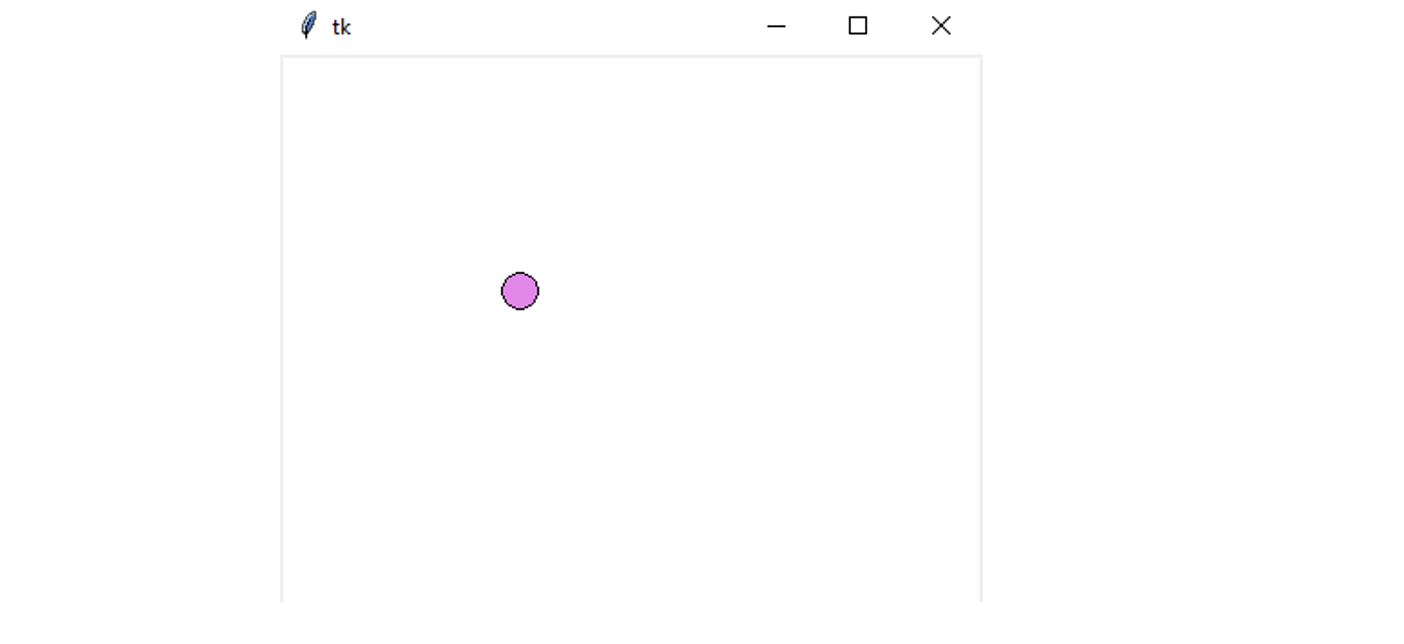

# Ex_14
Графическое приложение на Tkinter
 

Теперь следует рассмотреть небольшое приложение, написанное с использованием Tkinter. В этом приложении будет загружен файл с графическим изображением. Приложение будет иметь простейшее меню File с пунктами Open и Exit, а также виджет Canvas, на котором и будут демонстрироваться изображения (опять потребуется пакет PIL): 

Для создания иерархического меню в tkinter применяется виджет Menu.

Меню может содержать много элементов, причем эти элементы сами могут представлять меню и содержать другие элементы. В зависимости от того, какой тип элементов мы хотим добавить в меню, будет отличаться метод, используемый для их добавления. В частности, нам доступны следующие методы:

- add_command(options): добавляет элемент меню через параметр options

- add_cascade(options): добавляет элемент меню, который в свою очередь может представлять подменю

- add_separator(): добавляет линию-разграничитель

- add_radiobutton(options): добавляет в меню переключатель

- add_checkbutton(options): добавляет в меню флажок

In [1]:
from tkinter.filedialog import *
# from tkinter import *
from PIL import Image, ImageTk
# from tkinter.filedialog import askopenfilename, asksaveasfilename
global img, imgobj

def show():
    global img, imgobj
    # Запрос на имя файла
    filename = askopenfilename()
    if filename != (): # Если имя файла было задано пользователем # рисуется изображение из файла
        src_img = Image.open(filename)
        img = ImageTk.PhotoImage(src_img)
        # конфигурируется изображение на рисунке
        c.itemconfigure(imgobj, image=img, anchor="nw")

tk = Tk()
main_menu = Menu(tk)	# формируется меню # Виджет меню, позволяющий отображать строки меню, выпадающие и всплывающие меню
tk.config(menu=main_menu) # меню добавляется к окну
file_menu = Menu(main_menu) # создается подменю
main_menu.add_cascade(label="File", menu=file_menu)
# Заполняется меню File
file_menu.add_command(label="Open", command=show)
file_menu.add_separator() # черта для отделения пунктов меню
file_menu.add_command(label="Exit", command=tk.destroy)

c = Canvas(tk, width=400, height=400, bg="white") # готовим объект-изображение на рисунке
imgobj = c.create_image(0, 0)
c.pack()
tk.mainloop()


NameError: name 'Tk' is not defined

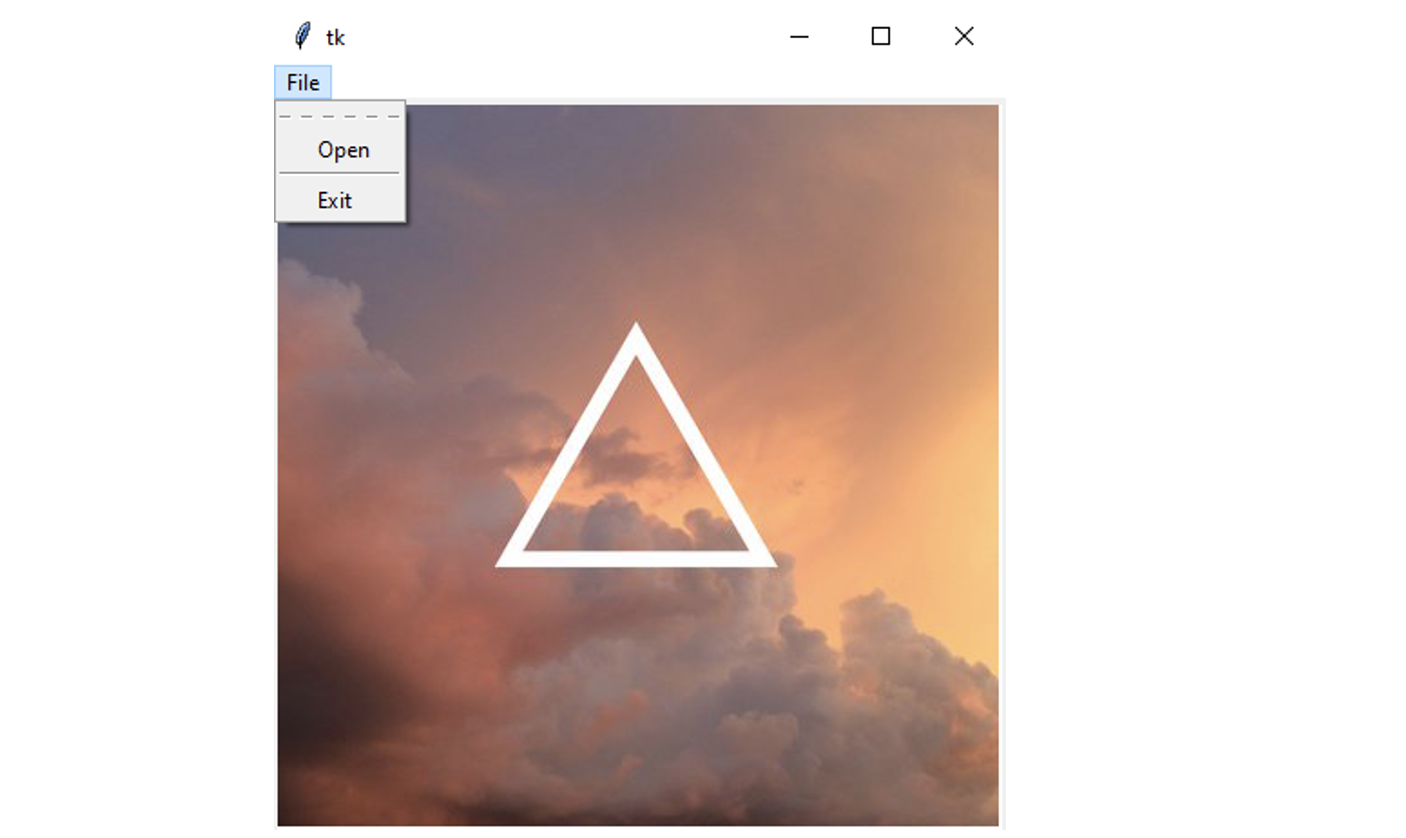

Стоит отметить, что здесь пришлось применить две глобальные переменные. Это не очень хорошо. Существует другой подход, когда приложение создается на основе окна верхнего уровня. Таким образом, само приложение становится особым виджетом. Переделанная программа представлена ниже:


In [2]:
from tkinter.filedialog import *
from tkinter import Tk
from PIL import Image, ImageTk

class App(Tk):
    def __init__(self):
        super().__init__()
        main_menu = Menu(self)
        self.config(menu=main_menu)
        file_menu = Menu(main_menu)
        main_menu.add_cascade(label="File", menu=file_menu)
        file_menu.add_command(label="Open", command=self.show_img)
        file_menu.add_separator()
        file_menu.add_command(label="Exit", command=self.destroy)

        self.c = Canvas(self, width=300, height=300, bg="white")
        self.imgobj = self.c.create_image(0, 0)
        self.c.pack()

    def show_img(self):
        filename = askopenfilename()
        if filename != ():
            src_img = Image.open(filename)
            self.img = ImageTk.PhotoImage(src_img)
            self.c.itemconfigure(self.imgobj, image=self.img, anchor="nw")

app = App()
app.mainloop()


NameError: name 'Menu' is not defined

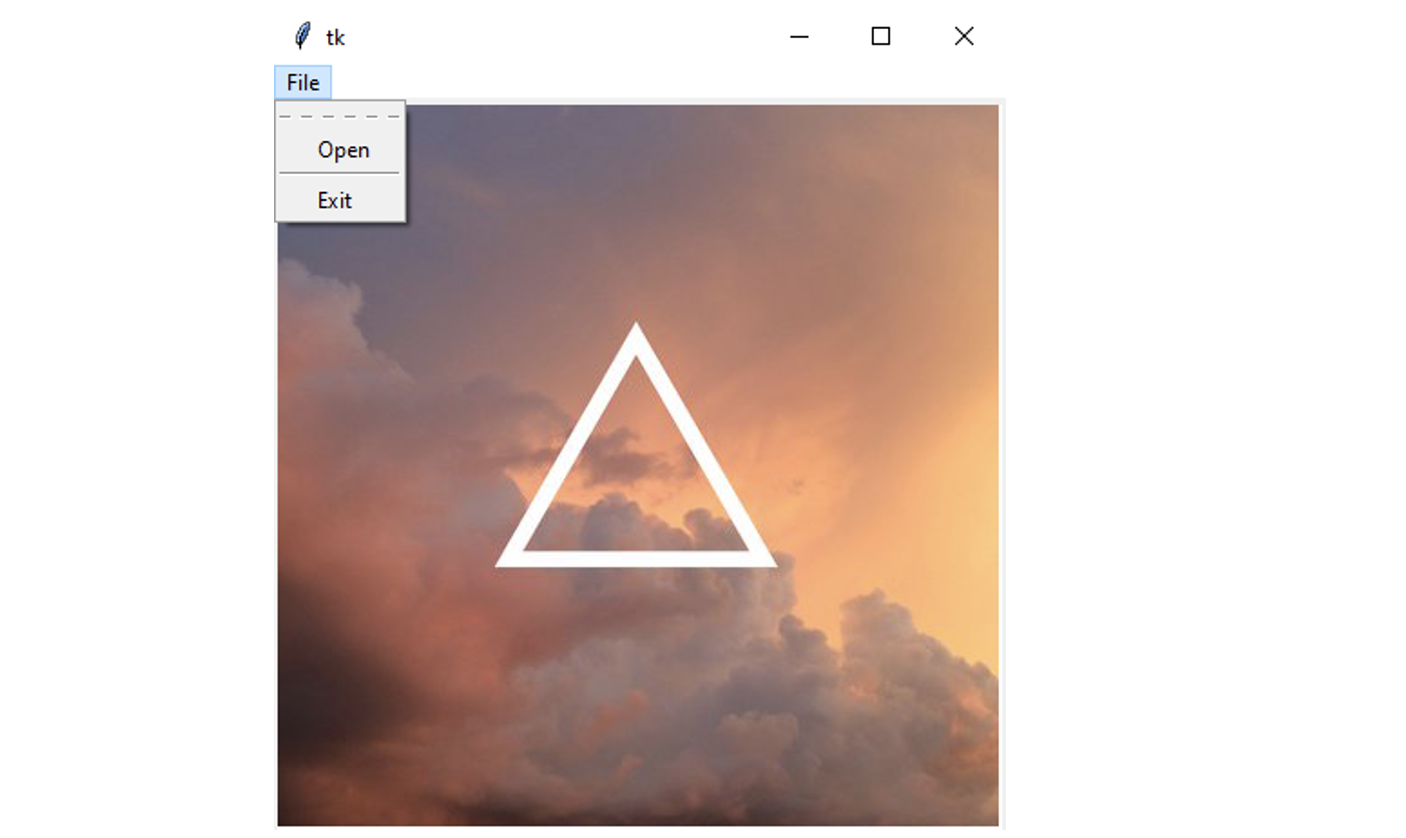

В объекте заключена информация, которая до этого была глобальной со всеми следующими из этого ограничениями. Можно пойти дальше и выделить в отдельный метод настройку меню (если приложение будет динамически изменять меню, объекты- меню тоже могут быть сохранены в приложении).

Примечание:

На некоторых системах новые версии Python плохо работают с национальными кодировками, в частности, с кодировками для кириллицы. Это связано с переходом на Unicode Tcl/Tk. Проблем можно избежать, если использовать кодировку UTF-8 в строках, которые должны выводиться в виджетах.


# Ex_15
Листинг 1

In [1]:
from tkinter import Tk, Label, Button, StringVar

class MyFirstGUI:
    LABEL_TEXT = [
        "This is our first GUI!",
        "Actually, this is our second GUI.",
        "We made it more interesting...",
        "...by making this label interactive.",
        "Go on, click on it again.",
    ]
    def __init__(self, master):
        self.master = master
        master.title("A simple GUI")

        self.label_index = 0
        self.label_text = StringVar()
        self.label_text.set(self.LABEL_TEXT[self.label_index])
        self.label = Label(master, textvariable=self.label_text)
        self.label.bind("<Button-1>", self.cycle_label_text)
        self.label.pack()

        self.greet_button = Button(master, text="Greet", command=self.greet)
        self.greet_button.pack()

        self.close_button = Button(master, text="Close", command=master.quit)
        self.close_button.pack()

    def greet(self):
        print("Greetings!")

    def cycle_label_text(self, event): # получаем другой индекс
        self.label_index += 1
        self.label_index %= len(self.LABEL_TEXT) # wrap around
        self.label_text.set(self.LABEL_TEXT[self.label_index])

root = Tk()
my_gui = MyFirstGUI(root)
root.mainloop()


Greetings!
Greetings!


# Ex_17
Листинг 2

In [1]:
from tkinter import Tk, Label, Button, Entry, IntVar, END, W, E


class Calculator:
    def __init__(self, master:'Tk'):
        self.master = master
        master.title("Calculator")
        self.total = 0
        self.entered_number = 0
        self.total_label_text = IntVar()
        self.total_label_text.set(self.total)
        self.total_label = Label(master, textvariable=self.total_label_text)
        self.label = Label(master, text="Total:")
        vcmd = master.register(self.validate)
        self.entry = Entry(master, validate="key", validatecommand=(vcmd, '%P'))
        # validate='key' - валидация при каждом вводе нового символа. validatecommand говорит,
        # что валидировать ввод будет команда "check".
        # Второй элемент - подстановка "%P" представляет новое значение, которое передается в функцию валидации.
        # Собственно саму валидацию выполняет функция is_valid().
        # Она принимает один параметр - текущее значение Entry, которое надо валидировать.
        # Она возвращает True, если значение прошло валидацию, и False, если не прошло.
        # Сама логика валидации представляет проверку строки на регулярное выражение "^\+\d*$".
        # Если новое значение соответствует этому выражению, и в нем не больше 12 символов, то оно прошло валидацию.
        self.add_button = Button(master, text="+", command=lambda: self.update("add"))
        self.subtract_button = Button(master, text="-", command=lambda: self.update("subtract"))
        self.multiple_button = Button(master, text="*", command=lambda: self.update("multiple"))
        self.divide_button = Button(master, text="//", command=lambda: self.update("divide"))
        self.reset_button = Button(master, text="Reset", command=lambda: self.update("reset"))
        self.label.grid(row=0, column=0, sticky=W)
        self.total_label.grid(row=0, column=1, columnspan=2, sticky=E)
        self.entry.grid(row=1, column=0, columnspan=3, sticky=W+E)
        self.add_button.grid(row=2, column=0)
        self.subtract_button.grid(row=2, column=1)
        self.multiple_button.grid(row=3, column=0)
        self.divide_button.grid(row=3, column=1)
        self.reset_button.grid(row=2, column=2, sticky=W+E)

    def validate(self, new_text: str):
        if not new_text: # the field is being cleared
            self.entered_number = 0
            return True
        try:
            self.entered_number = int(new_text)
            return True
        except ValueError:
            return False
    def update(self, method):
        if method == "add":
            self.total += self.entered_number
        elif method == "subtract":
            self.total -= self.entered_number
        elif method == "multiple":
            self.total *= self.entered_number
        elif method == "divide":
            self.total //= self.entered_number
        else: # reset
            self.total = 0
        self.total_label_text.set(self.total)
        self.entry.delete(0, END)

root = Tk()
my_gui = Calculator(root)
root.mainloop()


# Ex_18
Листинг 3

In [1]:
from tkinter import *

class MyApp(object):
    def __init__(self, parent):


        self.canvas_dimension = 600
        self.wait_time = 8
        self.repetitions = 2


        self.myParent = parent
        self.main_frame = Frame(parent)
        self.main_frame.pack()


        self.draw_frame = Frame(self.main_frame)
        self.draw_frame.pack(side=TOP)

        self.info_canvas = Canvas(self.draw_frame, height=20,
                                   width=self.canvas_dimension)
        self.info_canvas.pack(side=TOP)
        self.text_area = self.info_canvas.create_text(10,10,anchor='nw')
        self.info_canvas.itemconfigure(self.text_area,text="#circles = {:d}".format(self.repetitions)) # аргумент следует рассматривать как целое число и форматировать его именно так.

        self.main_canvas = Canvas(self.draw_frame, height=self.canvas_dimension,
                                  width=self.canvas_dimension)
        self.main_canvas.pack()

        self.button_frame = Frame(self.main_frame)
        self.button_frame.pack(side=BOTTOM)

        self.draw_button = self.new_button(self.button_frame,self.draw, 'Draw', LEFT)
        self.clear_button = self.new_button(self.button_frame,self.clear, 'Clear', LEFT)
        self.increase_button = self.new_button(self.button_frame,self.increase, 'Increase', LEFT)
        self.reduce_button = self.new_button(self.button_frame,self.reduce, 'Reduce', LEFT)
        self.quit_button = self.new_button(self.button_frame,self.quit, 'Quit', RIGHT)

    @staticmethod
    def new_button(parent, cmd, buttontext, packlocation):
        button = Button(parent, command=cmd)
        button.configure(text=buttontext)
        button.configure(width=10,
                         padx='2m', pady='1m')
        button.pack(side=packlocation)
        return button

    def clear(self):
        self.main_canvas.delete("all")

    def reduce(self):
        if self.repetitions > 1:
            self.repetitions //= 2
        self.put_info()

    def increase(self):
        if self.repetitions < 200:
            self.repetitions *= 2
        self.put_info()

    def put_info(self):
        self.info_canvas.itemconfigure(self.text_area,text="#circles = {:d}".format(self.repetitions))

    def draw(self):
        self.clear()
        boundary_offset = 2
        max_radius = (self.canvas_dimension - 2*boundary_offset) // 2
        xc = self.canvas_dimension//2 + boundary_offset
        r = max_radius/self.repetitions
        inc = r
        for i in range(self.repetitions):
            self.main_canvas.create_oval((xc-r, xc-r, xc+r, xc+r))
            r += inc
            self.main_canvas.update()

            self.main_canvas.after(self.wait_time)

    def quit(self):
        self.myParent.destroy()

if __name__ == "__main__":
    root = Tk()
    root.title("Drawing a circle")
    myapp = MyApp(root)
    root.mainloop()


## Заключение
В этой лекции было дано представление о (невизуальном) программировании графического интерфейса для Python на примере пакета Tkinter. Программа с графическим интерфейсом - событийно-управляемая программа, проводящая время в цикле обработки событий. События могут быть вызваны функционированием графического интерфейса или другими причинами (например, по таймеру). Обычно события возникают в виджетах и некоторые из них должны обрабатываться приложением. В Tkinter событие представлено отдельным объектом, из атрибутов которого можно установить, каково было положение указателя (курсора мыши), в каком виджете произошло событие и т.п.

Здесь были рассмотрены классы элементов интерфейса (виджеты), их свойства и методы. Виджеты имеют большое количество свойств и методов. Некоторые свойства и методы достаточно универсальны (их имеют все или почти все виджеты), другие же специфичны для конкретного класса виджетов. Графический пакет Python Imaging Library (PIL) предоставляет класс объекта для расположения в виджете-рисунке растрового графического изображения.

Виджеты располагаются внутри другого виджета (например, рамки) в соответствии с набором правил. Этот набор правил реализуют менеджеры расположения, которых в Tkinter три: pack, grid и place.

Приложение с графическим интерфейсом можно построить на базе окна верхнего уровня, простым наследованием. Этот подход позволяет инкапсулировать информацию, которую в противном случае пришлось бы делать глобальной.

Нужно отметить, что для построения интерфейса можно использовать не только чистый Tkinter. Например, в Python доступны модули ScrolledText и Tix, пополняющие набор виджетов. Кроме того, можно найти пакеты для специальных виджетов (например, для отображения дерева).

Построение графического интерфейса невизуальными способами - не такая сложная задача, если использовать Tkinter. Этот пакет входит в стандартную поставку Python и потому может использоваться почти везде, где установлен Python.

**Задание 1:**
Добавить в Листинг 2: деление, умножение. 

**Задание 2:**
Обработка динамического списка. В главном окне 8 кнопок:

1) Создание списка 
2) Вывод списка в консоль
3) Запись списка в файл
4) Количество элементов в списке. 
5) Добавление элемента в список 
6) Поиск элемента в списке 
7) Удаление элемента из списка 
8) Выход 

Каждая кнопка открывает новое окно для следующих действий: 1, 4, 5, 6, 7.

**Задание 3:**
Сделать меню, со списком фигур. 
Данная фигура является классом (Взять три любые фигуры из задания, которое давал ранее. Иерархия классов должна сохранится).
Вам необходимо их нарисовать и вывести площадь на экран. 
Ввод данных производится в окне. 
Можете добавить кнопку.

**Задание 4:**
1) Напишите программу, которая случайным образом выбирает целое число от 1 до 100. Ваша программа должна запрашивать у пользователя догадки — если пользователь угадывает неправильно, она должна печатать, является ли догадка слишком высокой или слишком низкой. Если пользователь угадывает правильно, программа должна вывести количество догадок, сделанных пользователем, чтобы угадать правильный ответ. Вы можете предположить, что пользователь введет правильный ввод.
2) Вы должны создать класс, который будет принимать экземпляр класса Tk().
3) Должны быть три кнопки:
·      Ввод значения 
·      Начать заново 
·      Вывод сообщения о количестве попыток
4) Должна быть надпись о догадках куда следовать (верх, вниз, правильный ответ)
5) Значение выбирается рандомно
6) Ввод строки, где будет проверяется правильность введенного значения (тут нужно быть внимательнее и проверять, на то чтобы буквы не вводились и  небыло выхода за границы поиска) 


## Задание 1

In [ ]:
from tkinter import Tk, Label, Button, Entry, IntVar, END, W, E


class Calculator:
    def __init__(self, master:'Tk'):
        self.master = master
        master.title("Calculator")
        self.total = 0
        self.entered_number = 0
        self.total_label_text = IntVar()
        self.total_label_text.set(self.total)
        self.total_label = Label(master, textvariable=self.total_label_text)
        self.label = Label(master, text="Total:")
        vcmd = master.register(self.validate)
        self.entry = Entry(master, validate="key", validatecommand=(vcmd, '%P'))
        # validate='key' - валидация при каждом вводе нового символа. validatecommand говорит,
        # что валидировать ввод будет команда "check".
        # Второй элемент - подстановка "%P" представляет новое значение, которое передается в функцию валидации.
        # Собственно саму валидацию выполняет функция is_valid().
        # Она принимает один параметр - текущее значение Entry, которое надо валидировать.
        # Она возвращает True, если значение прошло валидацию, и False, если не прошло.
        # Сама логика валидации представляет проверку строки на регулярное выражение "^\+\d*$".
        # Если новое значение соответствует этому выражению, и в нем не больше 12 символов, то оно прошло валидацию.
        self.add_button = Button(master, text="+", command=lambda: self.update("add"))
        self.subtract_button = Button(master, text="-", command=lambda: self.update("subtract"))
        self.multiple_button = Button(master, text="*", command=lambda: self.update("multiple"))
        self.divide_button = Button(master, text="//", command=lambda: self.update("divide"))
        self.reset_button = Button(master, text="Reset", command=lambda: self.update("reset"))
        self.label.grid(row=0, column=0, sticky=W)
        self.total_label.grid(row=0, column=1, columnspan=2, sticky=E)
        self.entry.grid(row=1, column=0, columnspan=3, sticky=W+E)
        self.add_button.grid(row=2, column=0)
        self.subtract_button.grid(row=2, column=1)
        self.multiple_button.grid(row=3, column=0)
        self.divide_button.grid(row=3, column=1)
        self.reset_button.grid(row=2, column=2, sticky=W+E)

    def validate(self, new_text: str):
        if not new_text: # the field is being cleared
            self.entered_number = 0
            return True
        try:
            self.entered_number = int(new_text)
            return True
        except ValueError:
            return False
    def update(self, method):
        if method == "add":
            self.total += self.entered_number
        elif method == "subtract":
            self.total -= self.entered_number
        elif method == "multiple":
            self.total *= self.entered_number
        elif method == "divide":
            self.total //= self.entered_number
        else: # reset
            self.total = 0
        self.total_label_text.set(self.total)
        self.entry.delete(0, END)

root = Tk()
my_gui = Calculator(root)
root.mainloop()

## Задание 2

In [ ]:
from tkinter import *

arr = []


def action(number):
    if number == 1:
        def make_list(string: str):
            global arr
            arr = string.split('--')
            window_1.destroy()

        window_1 = Tk()
        make_label = Label(master=window_1, text='Введите элементы списка через --.')
        entry = Entry(master=window_1, width=40)
        entry_button = Button(master=window_1, text='Ввод', command=lambda: make_list(entry.get()))

        make_label.grid(row=0, column=0)
        entry.grid(row=1, column=0)
        entry_button.grid(row=2, column=0)
        window_1.mainloop()

    if number == 2:
        print(arr)

    if number == 3:
        file = open('output.txt', 'w')
        out = f"[{', '.join(arr)}]"
        file.write(out)

    if number == 4:
        window_4 = Tk()
        length_label = Label(master=window_4, text=f'Длина списка: {len(arr)}')
        close_button = Button(master=window_4, text='Закрыть', command=lambda: window_4.destroy())
        length_label.grid(row=0, column=0)
        close_button.grid(row=1, column=0)
        window_4.mainloop()

    if number == 5:
        def add(string):
            arr.append(string)
            window_5.destroy()

        window_5 = Tk()
        add_label = Label(master=window_5, text='Введите один элемент для добавления в список.')
        entry = Entry(master=window_5, width=40)
        entry_button = Button(master=window_5, text='Ввод', command=lambda: add(entry.get()))

        add_label.grid(row=0, column=0)
        entry.grid(row=1, column=0)
        entry_button.grid(row=2, column=0)
        window_5.mainloop()

    if number == 6:
        def search(string):
            window_6.destroy()

            search_window = Tk()
            text = f'Такой элемент есть в списке. Его индекс: {arr.index(string)}.' if string in arr\
                else f'Такого элемента нет в списке.'
            search_result_label = Label(master=search_window, text=text)
            close_button = Button(master=search_window, text='Закрыть', command=lambda: search_window.destroy())
            search_result_label.grid(row=0, column=0)
            close_button.grid(row=1, column=0)
            search_window.mainloop()

        window_6 = Tk()
        search_label = Label(master=window_6, text='Введите один элемент для поиска в списке.')
        entry = Entry(master=window_6, width=40)
        entry_button = Button(master=window_6, text='Ввод', command=lambda: search(entry.get()))

        search_label.grid(row=0, column=0)
        entry.grid(row=1, column=0)
        entry_button.grid(row=2, column=0)

    if number == 7:
        def delete(string):
            window_7.destroy()

            delete_window = Tk()
            deleted = arr[arr.index(string)]
            text = f'Элемент {deleted} удалён из списка.' if string in arr\
                else f'Такого элемента и так нет в списке.'
            del arr[arr.index(string)]
            delete_result_label = Label(master=delete_window, text=text)
            close_button = Button(master=delete_window, text='Закрыть', command=lambda: delete_window.destroy())

            delete_result_label.grid(row=0, column=0)
            close_button.grid(row=1, column=0)
            delete_window.mainloop()


        window_7 = Tk()
        delete_label = Label(master=window_7, text='Введите один элемент для удаления из списка.')
        entry = Entry(master=window_7, width=40)
        entry_button = Button(master=window_7, text='Ввод', command=lambda: delete(entry.get()))

        delete_label.grid(row=0, column=0)
        entry.grid(row=1, column=0)
        entry_button.grid(row=2, column=0)
        window_7.mainloop()


window = Tk()
window.title("Cписок")

make_button = Button(master=window, text="Создание списка", command=lambda: action(1))
output_button = Button(master=window, text="Вывод списка в консось", command=lambda: action(2))
write_button = Button(master=window, text="Запись списка в файл", command=lambda: action(3))
length_button = Button(master=window, text="Количество элементов в списке", command=lambda: action(4))
add_button = Button(master=window, text="Добавление элемента в список", command=lambda: action(5))
search_button = Button(master=window, text="Поиск элемента в списке", command=lambda: action(6))
delete_button = Button(master=window, text="Удаление элемента из списка", command=lambda: action(7))
exit_button = Button(master=window, text="Выход", command=lambda: window.destroy())

make_button.grid(row=0, column=0)
output_button.grid(row=1, column=0)
write_button.grid(row=2, column=0)
length_button.grid(row=3, column=0)
add_button.grid(row=4, column=0)
search_button.grid(row=5, column=0)
delete_button.grid(row=6, column=0)
exit_button.grid(row=7, column=0)

window.mainloop()

## Задание 3

In [ ]:
import tkinter as tk

entry_window = tk.Tk()
action = 0

def create_figure(num):
    global action
    action = num
    entry_window.destroy()

figure1_button = tk.Button(command=lambda: create_figure(1), text='Ладья')
figure2_button = tk.Button(command=lambda: create_figure(2), text='Королевский дракон (Король + Ладья)')
figure3_button = tk.Button(command=lambda: create_figure(3), text='Слон с дальностью две клетки')

figure1_button.grid(row=0, column=0)
figure2_button.grid(row=1, column=0)
figure3_button.grid(row=2, column=0)

entry_window.mainloop()

root = tk.Tk()
root.geometry("400x400")
canvas = tk.Canvas(root, width=400, height=400)

for row in range(8):
    for col in range(8):
        x1 = col * 50
        y1 = row * 50
        x2 = x1 + 50
        y2 = y1 + 50

        if (row + col) % 2 == 0:
            color = "white"
        else:
            color = "black"

        canvas.create_rectangle(x1, y1, x2, y2, fill=color)


class Figure:
    def __init__(self, type):
        self.type = type

    @staticmethod
    def make_pattern(self):
        canvas.create_rectangle(200, 150, 250, 200, fill='yellow')
        if self.type == 'Ладья':
            canvas.create_rectangle(200, 200, 250, 500, fill='cyan')
            canvas.create_rectangle(200, 0, 250, 150, fill='cyan')
            canvas.create_rectangle(0, 150, 200, 200, fill='cyan')
            canvas.create_rectangle(250, 150, 400, 200, fill='cyan')
        if self.type == 'Королевский дракон':
            canvas.create_rectangle(200, 200, 250, 500, fill='cyan')
            canvas.create_rectangle(200, 0, 250, 150, fill='cyan')
            canvas.create_rectangle(0, 150, 200, 200, fill='cyan')
            canvas.create_rectangle(250, 150, 400, 200, fill='cyan')
            canvas.create_rectangle(150, 100, 300, 250, fill='cyan')
            canvas.create_rectangle(200, 150, 250, 200, fill='yellow')
        if self.type == 'Слоник':
            canvas.create_rectangle(100, 50, 150, 100, fill='cyan')
            canvas.create_rectangle(150, 100, 200, 150, fill='cyan')
            canvas.create_rectangle(250, 100, 300, 150, fill='cyan')
            canvas.create_rectangle(300, 50, 350, 100, fill='cyan')
            canvas.create_rectangle(150, 200, 200, 250, fill='cyan')
            canvas.create_rectangle(100, 250, 150, 300, fill='cyan')
            canvas.create_rectangle(250, 200, 300, 250, fill='cyan')
            canvas.create_rectangle(300, 250, 350, 300, fill='cyan')


if action == 1:
    tower = Figure('Ладья')
    tower.make_pattern(tower)
if action == 2:
    dragon = Figure('Королевский дракон')
    dragon.make_pattern(dragon)
if action == 3:
    elefant = Figure('Слоник')
    elefant.make_pattern(elefant)

canvas.pack()
root.mainloop()

## Задание 4

In [ ]:
import random
import tkinter as tk

class GuessingGame:
    def __init__(self, master):
        self.master = master
        master.title("Угадай число")

        self.number = random.randint(1, 100)
        self.guesses = 0

        self.guess_label = tk.Label(master, text="Введите число от 1 до 100:")
        self.guess_label.pack()

        self.guess_entry = tk.Entry(master)
        self.guess_entry.pack()

        self.result_label = tk.Label(master, text="")
        self.result_label.pack()

        self.submit_button = tk.Button(master, text="Ввод значения", command=self.guess_number)
        self.submit_button.pack()

        self.restart_button = tk.Button(master, text="Начать заново", command=self.restart_game)
        self.restart_button.pack()

        self.guesses_button = tk.Button(master, text="Вывод сообщения о количестве попыток", command=self.show_guesses)
        self.guesses_button.pack()

    def guess_number(self):
        guess = self.guess_entry.get()
        try:
            guess = int(guess)
        except ValueError:
            self.result_label.config(text="Вы ввели не число. Попробуйте еще раз.")
            return

        if guess < 1 or guess > 100:
            self.result_label.config(text="Число должно быть от 1 до 100. Попробуйте еще раз.")
            return

        self.guesses += 1

        if guess == self.number:
            self.result_label.config(text=f"Верно! Количество попыток: {self.guesses}")
        elif guess < self.number:
            self.result_label.config(text="Загаданное число выше.")
        else:
            self.result_label.config(text="Загаданное число ниже.")

        self.guess_entry.delete(0, 'end')

    def restart_game(self):
        self.number = random.randint(1, 100)
        self.guesses = 0
        self.result_label.config(text="")
        self.guess_entry.delete(0, 'end')

    def show_guesses(self):
        self.result_label.config(text=f"Вы сделали {self.guesses} попыток.")

root = tk.Tk()
my_game = GuessingGame(root)
root.mainloop()